# News Media and the Iraq War - Sentiment Analysis Pipeline

Michael Wing-Cheung Wong

## Overview

Python and module versions used:
- Python ver. 3.7.3
- numpy ver. 1.19.0
- pandas ver. 1.1.0
- seaborn ver. 0.10.1
- matplotlib ver. 3.2.2
- scikit-learn ver. 0.22.1
- joblib ver. 0.16.0
- XGBoost ver. 1.2.0
- lightgbm ver. 3.0.0
- keras ver. 2.4.3
- zeugma ver. 0.46
- simpletransformers ver. 0.48.14

# Module Calls

In [1]:
############### PYTHON 3



#Module Imports
import os
import platform
import sklearn
import matplotlib
import re
import json
import lightgbm
import keras
import xgboost
import pickle
import joblib
import zeugma
import simpletransformers
import nltk

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from typing import Iterable, List, Union
from bs4 import BeautifulSoup
from joblib import dump, load

from scipy.stats import randint as sp_randint
from scipy.special import softmax
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin, BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')
  

from gensim.models import KeyedVectors

from keras import layers
from keras.models import Sequential, load_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping

from zeugma.embeddings import EmbeddingTransformer

from simpletransformers.classification import ClassificationModel, ClassificationArgs

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

%matplotlib inline


print("Python ver. "+platform.python_version())
print("numpy ver. "+np.__version__)
print("pandas ver. "+pd.__version__)
print("seaborn ver. "+sns.__version__)
print("matplotlib ver. "+matplotlib.__version__)
print("scikit-learn ver. "+sklearn.__version__)
print("XGBoost ver. "+xgboost.__version__)
print("lightgbm ver. "+lightgbm.__version__)
print("keras ver. "+keras.__version__)
# print("simpletransformers ver. "+simpletransformers.__version__)
print("zeugma ver. "+zeugma.__version__)
print("joblib ver."+joblib.__version__)

pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Michael\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Python ver. 3.8.5
numpy ver. 1.19.2
pandas ver. 1.2.0
seaborn ver. 0.11.1
matplotlib ver. 3.3.3
scikit-learn ver. 0.23.2
XGBoost ver. 1.3.1
lightgbm ver. 3.1.1
keras ver. 2.4.3
zeugma ver. 0.48
joblib ver.1.0.0


<ipython-input-1-34d27aa9d52d>:88: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Data Read-in and Cleaning

In [2]:
## Data Read-in, ignore unnecessary columns
data = pd.read_csv("Data/train_test.csv",encoding = "ISO-8859-1")
data.tail()

,id,coding,text
2860,474a922db3a2c06f5d89b0927b56dedc_0,1,"iraq is on the verge of reviving an 11-year-old contract with china worth $1.2 billion, its largest oil deal since the invasion in 2003, an oil ministry official said tuesday."
2861,ac01c48ea5fb695cf3fce2691ae91c70_16,1,"""when there are errors in the process we seek to rectify it immediately,"" he said. ""but we are very confident in the process that we have."""
2862,98b7e5c8b578dfe3077c65d0b6b8478f_13,0,"''extremists from inside and outside the country want to stir an endless cycle of violence, and al qaeda is operating and trying to open new fronts,'' he said in his speech, to soldiers from the 25th infantry division and task force lightning stationed at camp speicher."
2863,8368f6c598f4c16c0698851ffbe048a9_3,1,"but mr. alsammarae is bitter because, he said, the has left him in his hour of need to the vagaries of an iraqi court system that in many ways is still the opaque and frightening apparatus it was before the invasion. ''when somebody is giving his life to service as an american here, he should be dealt with in a different way,'' he said, complaining of what he called a lack of action by the american embassy. ''if they did anything for me, i am not aware of it.''"
2864,479031a6d4cabd6d0bccf1421711195d_12,0,"in addition to the latest bombings at the government headquarters in ramadi, twin bombings in october killed 26 people and wounded 65 at a reconciliation meeting in ramadi attended by government officials, tribal leaders and security commanders."


            coding
count  2865.000000
mean   0.227574   
std    0.419339   
min    0.000000   
25%    0.000000   
50%    0.000000   
75%    0.000000   
max    1.000000   
2865


D:\Users\Michael\anaconda3\envs\ml_nlp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


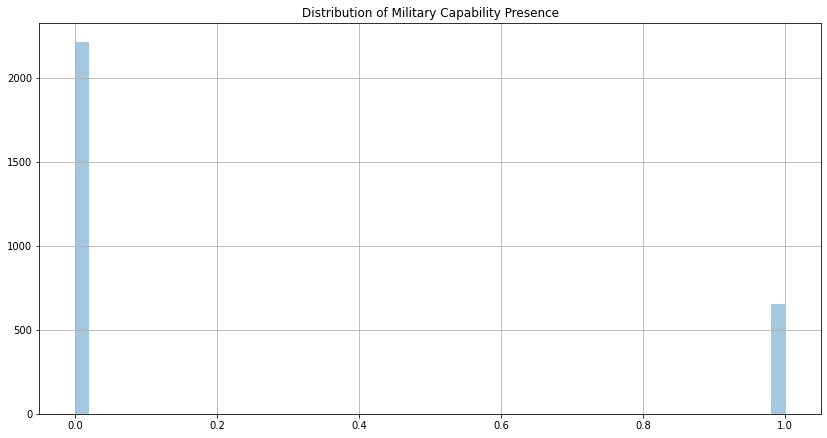

In [3]:
## Initial Data Visualization
print(data.describe())
print(len(data))
#print(data["Sentiment Score"].tolist())


fig, ax = plt.subplots(figsize=[14,7])
sentiment_histogram = sns.distplot(data["coding"].tolist(), kde=False)#, height=7, aspect=0.9)
# sns.set()
plt.subplots_adjust(top=0.9)
plt.title("Distribution of Military Capability Presence")
plt.grid()
#plt.savefig('figures\sns fig1.png') 

In [4]:
## Manually convert sentiment scores to positive/negative binary categories and move to target array

X = pd.DataFrame(data["text"])
y = data["coding"]

#Since sentiment can be considered to be ordinal, use label encoder
# le = LabelEncoder()
# le.fit(y)
# y = le.transform(y)

# X = X.drop("Sentiment Score", axis=1)
display(X)
display(y)
# print(le.classes_)
print(len(y))

,text
0,"in samarra, a roadside bomb exploded sunday, killing four interior ministry commandos, wounding two and destroying their truck. the commandos recently arrived in samarra to secure the town after the bombing of the askariya shrine. a bomb also exploded near an american convoy in the town. there were no reports of casualties."
1,"''it's not just about what happened today,'' said jalal al-din al-sagheer, a member of mr. muhammad's party. ''we exploded with anger because today's actions were part of an accumulation of problems, one by one.''"
2,"the americans got on the radio and asked the iraqi army to send an ambulance. meanwhile, the woman was lifted onto a stretcher and taken to the medics' stryker."
3,"but the democrats on the committee lost the support of two republican colleagues who had voted for the loan in the senate earlier this month, sam brownback of kansas and ben nighthorse campbell of colorado. once senators on the committee voted 16 to 13 against the loans on wednesday afternoon, the provision was permanently dropped from the bill, and neither chamber will be able to restore it when they vote on the measure later this week. the legislation will then go to the president for his signature."
4,"the statements came on another day, the second since the elections, with a low level of insurgent attacks in iraq. on sunday, according to figures provided by the american military command, insurgents mounted 260 attacks, the highest number on any day since american troops captured baghdad nearly 22 months ago. the attacks, including suicide bombings, killed about 50 people, but failed to have more than a marginal impact on the voting, in which about 8 million iraqis cast ballots out of more than 14 million who were eligible, according to the estimate given by top officials of the election commission as the polls closed."
...,...
2860,"iraq is on the verge of reviving an 11-year-old contract with china worth $1.2 billion, its largest oil deal since the invasion in 2003, an oil ministry official said tuesday."
2861,"""when there are errors in the process we seek to rectify it immediately,"" he said. ""but we are very confident in the process that we have."""
2862,"''extremists from inside and outside the country want to stir an endless cycle of violence, and al qaeda is operating and trying to open new fronts,'' he said in his speech, to soldiers from the 25th infantry division and task force lightning stationed at camp speicher."
2863,"but mr. alsammarae is bitter because, he said, the has left him in his hour of need to the vagaries of an iraqi court system that in many ways is still the opaque and frightening apparatus it was before the invasion. ''when somebody is giving his life to service as an american here, he should be dealt with in a different way,'' he said, complaining of what he called a lack of action by the american embassy. ''if they did anything for me, i am not aware of it.''"


0       0
1       0
2       0
3       0
4       0
       ..
2860    1
2861    1
2862    0
2863    1
2864    0
Name: coding, Length: 2865, dtype: int64

2865


In [5]:
# Take only 10% of data for speed purposes
# X, _, y, _ = train_test_split(X, y, test_size=0.7, random_state=42)
# display(X)
# display(y)

In [6]:
## Do preprocessing here since it is not dependent on data splitting

def tweet_cleaner(X):
    print("Preprocessing...")
    X["Tweet"] = [(BeautifulSoup(tweet,"lxml").get_text()) for tweet in X["Tweet"]]
    X["Tweet"] = [re.sub(r"@[A-Za-z0-9]+","",tweet) for tweet in X["Tweet"]]
    X["Tweet"] = [re.sub("https?://[A-Za-z0-9./]+","",tweet) for tweet in X["Tweet"]]
    X["Tweet"] = [re.sub("www.[A-Za-z0-9./]+","",tweet) for tweet in X["Tweet"]]
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X["Tweet"])
    X["Tweet"] = tokenizer.texts_to_sequences(X["Tweet"])
    X["Tweet"] = tokenizer.sequences_to_texts(X["Tweet"])
    print("Preprocess Complete")
    return X

def text_cleaner(X, column, stopwords=None, stem_words=False):

    # Clean the text, with the option to remove stopwords and to stem words.
    print("Preprocessing...")
    
    X_new = []
    # Convert words to lower case and split them
    for text in X[column]:
        text = text.lower().split()

        # Optionally, remove stop words
        if stopwords:
#             print(stopwords)
            text = [w for w in text if not w in stopwords]

        text = " ".join(text)

        # Clean the text
        text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
        text = re.sub(r"what's", "what is ", text)
        text = re.sub(r"that's", "that is ", text)
        text = re.sub(r"\'s", " ", text)
        text = re.sub(r"\'ve", " have ", text)
        text = re.sub(r"can't", "cannot ", text)
        text = re.sub(r"n't", " not ", text)
        text = re.sub(r"i'm", "i am ", text)
        text = re.sub(r"\'re", " are ", text)
        text = re.sub(r"\'d", " would ", text)
        text = re.sub(r"\'ll", " will ", text)
        text = re.sub(r",", " ", text)
        text = re.sub(r"--", " ", text)
        text = re.sub(r"\.", " ", text)
        text = re.sub(r"!", " ! ", text)
        text = re.sub(r"'", " ", text)
        text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
        text = re.sub(r":", " : ", text)
        text = re.sub(r" e g ", " eg ", text)
        text = re.sub(r" b g ", " bg ", text)
        text = re.sub(r" u s ", " american ", text)
        text = re.sub(r"\0s", "0", text)
        text = re.sub(r" 9 11 ", "911", text)
        text = re.sub(r"e - mail", "email", text)
        text = re.sub(r"\s{2,}", " ", text)

        # Optionally, shorten words to their stems
        if stem_words:
            text = text.split()
            stemmer = SnowballStemmer("english")
            stemmed_words = [stemmer.stem(word) for word in text]
            text = " ".join(stemmed_words)

        X_new.append(text)
    
    X[column] = np.array(X_new)
    
    print("Preprocess Complete")
    
    return X

In [7]:
X_new = text_cleaner(X, column="text", stopwords=stopwords.words("english"))

Preprocessing...
Preprocess Complete


# Train-test Split

In [8]:
## Split data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)
#display(X_train)

display(X_train[:5])
display(X_test[:5])
display(y_train[:5])
display(len(y_test))
#display(y_valid)

,text
1613,salaam smeasim another iraqi known years 55 candidate largest shiite opposition party iraqi national alliance salaam wears veil coalition includes many sadrists relations iran
2772,violence continued roil capital tuesday high-ranking official interior ministry narrowly escaped assassination attempt gunmen fired car killing one bodyguards wounding three ministry officials said
1032,suddenness french proposal left nations security council struggling ways respond keeping options open
2806,colliding priorities oversight spending left american iraqi officials quandary work behind scenes so-called compact iraq centerpiece american embassy effort create economic political milestones nation promises meet exchange pledges foreign investment support
2702,president bush traveling kuwait bahrain saturday praised vote calling an important step toward reconciliation said consolidate progress country past year prepared slow even halt american troop reductions beyond already planned bring levels back so-called troop surge began early 2006 so set stage renewed political debate war congress presidential campaign trail


,text
1590,we believe iraq unity sovereignty independence said reference unity slap mr hakim supreme council encouraged provinces form regions that constitution could considerable independence baghdad
1752,first time shiite political leaders traveled anbar meet sunni coalition gathering sheiks
772,lore streets mr hussein dashing profile world traveler seven masks taxi driver whispers promises victory passengers american agent
1735,assault near bayji wednesday took place day insurgents sowed fear across capital setting least five car truck bombs killed least 26 people according military estimates
387,northern front brig gen vincent k brooks said northern city tikrit mr hussein home town become primary focus military campaign loyal supporters hussein regime may encamped there american military officials said may hidden weapons mass destruction there still american commanders hinted rush force final confrontation officials also expressed concern iraqi forces may prepared set fire oil fields around kirkuk mosul largest northern city iraqi troops reported falling back refusing surrender


1613    0
2772    1
1032    0
2806    1
2702    1
Name: coding, dtype: int64

860

In [9]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_new, y, test_size=0.9, random_state=43)

# Supervised Learning

## Scikit Learn Pipeline Setup

In [10]:
# Function to fit a model pipeline
def pipeline_fit(X_train, y_train, pipeline, save_name, keras_nn=False, search_method=None,
                 n_iter=10, cv=5, verbose_searchcv=0, n_jobs=1):
    
    """
    Fits an sklearn machine learning pipeline
    
    Parameters
    ----------
    X_train : numpy array
        Training data 
        
    y_train : numpy array
        Training target data
        
    pipeline : string
        name of the sklearn pipeline to be fitted
            
    save_name : string
        name of saved joblib file
    
    keras_nn : boolean (default = False)
        set to True for Keras models
    
    search_method : string (default None)
        "randomsearch" for hyperparameter optimization using sklearn's RandomizedSearchCV
        "gridsearch" for hyperparameter optimization using sklearn's GridSearchCV
        None for no hyperparameter optimization
        
    n_iter : integer(default 10)
        number of parameter settings sampled, applies for randomsearch only
        
    cv : integer (default 5)
        number of cross validation folds for hyperparameter optimization
        
    verbose_searchcv : integer (default 0)
        set verbosity of search cv
        
    n_jobs : integer (default 1)
        number of jobs to run in parallel, -1 for all processors

    Returns
    -------
    sklearn fitted model object
    
    """
    
    while os.path.exists("{}_{}.joblib".format(save_name,pipeline)):
        # Check if a joblib file with that filename already exists, ask user for confirmation of overwrite
        skip = input('''A joblib model file already exists with that name, 
do you wish to retrain the model? (Y/N)''')
        if skip.lower().strip() == "y":
            break
        elif skip.lower().strip() == "n":
            print("Loaded pre-existing model:")
            print("Param Grid:", pipe_dict[pipeline][1])
            
            model_final = joblib.load("{}_{}.joblib".format(save_name,pipeline))
            
            # Load keras model and append to pipeline
            if keras_nn == True:
                model_final.named_steps["keras_estimator"].model = load_model("{}_{}.h5".format(save_name,pipeline))
                

            print("Parameters: ", model_final.get_params)

            return model_final

        else:
            print("That's not a valid response. Please try again.")
            
    
    # Do hyperparameter optimization
    
    # Keras hyperparameter search only works with a single process
    if keras_nn == True:
        n_jobs = 1
    else:
        pass
    
    
#     # Convert dataframes to numpy arrays
#     if isinstance(X_train, pd.DataFrame) and (len(X_train.columns) == 1):
#         X_train = X_train.values
        
#         # If X_train only has one feature, collapse to 1D array
#         if X_train.shape == 
#         X_train
    
#     if isinstance(y_train, pd.DataFrame) or isinstance(y_train, pd.Series):
#         y_train = y_train.values
        
#     # Check if training data is a series or dataframe, convert
#     if isinstance

    if search_method == "randomsearch":
        search_cv = RandomizedSearchCV(pipe_dict[pipeline][0], param_distributions=pipe_dict[pipeline][1], n_iter=n_iter,
                                       cv=cv, verbose=verbose_searchcv, n_jobs=n_jobs)
    elif search_method == "gridsearch":
        search_cv = GridSearchCV(pipe_dict[pipeline][0], param_grid=pipe_dict[pipeline][1],
                                 cv=cv, verbose=verbose_searchcv, n_jobs=n_jobs)
    elif search_method == None:
        
        # No optimization is performed, fit to model only
        print("No hyperparameter optimization")
        print("Training {} on {} samples...".format(pipeline,str(len(y_train))))
        print(pipe_dict[pipeline][0].steps[-1])
        model_final = pipe_dict[pipeline][0].fit(X_train, y_train)

        # For Keras neural networks, save the sklearn pipeline and Keras model separately
        # Use joblib to dump the best estimator to joblib file for persistence purposes
        if keras_nn == True:
            # print(model_final.named_steps["keras_estimator"].model.summary())            

            # Save Keras model and remove it from pipeline
            model_final.named_steps["keras_estimator"].model.save("{}_{}.h5".format(save_name,pipeline))
            model_final.named_steps["keras_estimator"].model = None

            # Save pipeline
            joblib.dump(model_final, save_name+"_"+pipeline+".joblib")

            # Rebuild pipeline to return
            model_final.named_steps["keras_estimator"].model = load_model("{}_{}.h5".format(save_name,pipeline))

            return model_final

        # Save the pipeline
        joblib.dump(model_final, "{}_{}.joblib".format(save_name,pipeline))

        return model_final

    print(pipe_dict[pipeline][0])
    print("Param Grid:", pipe_dict[pipeline][1])
    
    # Train the model
    print()
    print("Training {} on {} samples...".format(pipeline,str(len(y_train))))
    print("Shape of inputs:",X_train.shape)
    print(X_train[:5])
    print("Shape of outputs:",y_train.shape)
    print(y_train[:5])
    print()
#     try:
    search_cv.fit(X_train, y_train)
#     except ValueError:
#         ## If X_train is a dataframe with single column, convert y_train to match
#         search_cv.fit(X_train, y_train.reshape(-1,1))
        
    print("")
    print(pipeline+":")
    print("Best Score: ", search_cv.best_score_)
    print("Best Params: ", search_cv.best_params_)

    model_final = search_cv.best_estimator_
    
    # Use joblib to dump the best estimator to joblib file for persistence purposes
    # For Keras neural networks, save the sklearn pipeline and Keras model separately
    if keras_nn == True:
        # print(model_final.named_steps["keras_estimator"].model.summary())
        
        # Save Keras model and remove it from pipeline
        model_final.named_steps["keras_estimator"].model.save("{}_{}.h5".format(save_name,pipeline))
        model_final.named_steps["keras_estimator"].model = None
        
        # Save pipeline
        joblib.dump(model_final, save_name+"_"+pipeline+".joblib")
        
        # Rebuild pipeline to return
        model_final.named_steps["keras_estimator"].model = load_model("{}_{}.h5".format(save_name,pipeline))
        
        return model_final

    else:
        # Save the pipeline
        joblib.dump(model_final, "{}_{}.joblib".format(save_name,pipeline))

    return model_final

In [11]:
## Initiate a full preprocessing and prediction pipeline

# ## RandomizedSearchCV hyperparameter optimization
# nb_param_grid = {
#     "nb_classifier__alpha": [1,1e-1,1e-2,0]
#     }

# svm_param_grid = {
#     "svm_classifier__C": [x for x in np.logspace(-5,15,base=2,num=7)],
#     "svm_classifier__gamma": gamma
#     }

# lstm_param_grid = {
#     "lstm_classifier__embed_dim": [128],
#     "lstm_classifier__lstm_out": [200],
#     #"lstm_classifier__dropout": [0.2],
#     #"lstm_classifier__dropout_U": [0.2],
#     #"lstm_classifier__dropout_W": [0.2],
#     "lstm_classifier__epochs": [50, 100, 150],
#     "lstm_classifier__batch_size": [5, 10, 20]
#     }

In [12]:
# param_grid = {
#     #"preprocessor__tweet_transformer__tfidf_vectorizer__max_df": np.linspace(0.2, 1, 10),
#     "preprocessor__tweet_transformer__tfidf_vectorizer__binary": [True],
#     "preprocessor__tweet_transformer__tfidf_vectorizer__token_pattern": [r"(?u)\b\w\w+\b|\'"],
#     "preprocessor__tweet_transformer__tfidf_vectorizer__ngram_range": [(1,2)],
#     "preprocessor__tweet_transformer__tfidf_vectorizer__sop_": [(1,2)]
#     }

# nb_param_grid.update(param_grid)
# rf_param_grid.update(param_grid)
# gb_param_grid.update(param_grid)
# lgbm_param_grid.update(param_grid)
# xgb_param_grid.update(param_grid)
# svm_param_grid.update(param_grid)
# lstm_param_grid.update(param_grid)

In [13]:
# # Dictionary of pipelines and classifier types for ease of reference
# pipe_dict = {
#             "MultinomialNB" : (nb_clf_fullpipe, nb_param_grid),
#             "RandomForest" : (rf_clf_fullpipe, rf_param_grid),
#             "GradientBoosting" : (gb_clf_fullpipe, gb_param_grid),
#             "XGBoost" : (xgb_clf_fullpipe, xgb_param_grid),
#             "LightGBM" : (lgbm_clf_fullpipe, lgbm_param_grid),
#             "SVC" : (svm_clf_fullpipe, svm_param_grid),
#             "LSTM" : (LSTM_clf_fullpipe, lstm_param_grid)
#             }

In [14]:
# lstm_clf_final = pipeline_fit(pipeline="LSTM", cv=5, iid=False, verbose=2, n_jobs=1, optimization=True)

# Training, Predictions and Evaluation Metrics

## Plotting Functions

In [15]:
def plot_confusion_matrix(y_test, y_pred, classes, figsize=(8,8), save_name=None, cmap=plt.cm.Blues):
    
    """
    Plots a confusion matrix
    
    Parameters
    ----------
    y_test : numpy array
        Ground truth target values 
        
    y_pred : numpy array
        Predicted target values
        
    classes : numpy array
        class names 
        
    figsize : tuple (default = (8,8))
        a tuple for matplotlib figsize (x,y)    
        
    save_name : string (default = None)
        name of the plot to be saved, including the file extension
        None for no plot saving
        
    cmap : matplotlib colour map (default = Blue)

    Returns
    -------
    None
    
    """

    cm = confusion_matrix(y_test, y_pred)
    classes = classes[unique_labels(y_test, y_pred)]
    # Get normalized confusion matrix
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

#     print("Confusion Matrix")
#     print(cm)
#     print("Normalized Confusion Matrix")
#     print(cm_norm)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(None)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           ylabel="True Labels", xlabel="Predicted Labels")

    # Loop over data dimensions and create text annotations
    # using both normalized and non-normalized confusion matrices
    def annotated_text(i, j):
        return str(cm[i, j])+"\n("+str(format(cm_norm[i, j], ".2f"))+")"

    # Text color switches to provide contrast
    col_switch_thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, annotated_text(i, j),
                    ha="center", va="center",
                    color="white" if cm[i, j] > col_switch_thresh else "black")
    fig.tight_layout()
    
    if save_name is not None:
        fig = ax.get_figure()
        fig.savefig(save_name,bbox_inches="tight",pad_inches=0.2) 

In [16]:
def plot_roc_curve(y_test, y_score, classes, roc_multilabel_count=3, figsize=(8,8), save_name=None):
    
    """
    Plots ROC curves for classification scores
    
    Parameters
    ----------
    
    y_test : numpy array
        Ground truth target values 
        
    y_score : numpy array
        Predicted probabilities or decision functions of model of test set
        
    classes : numpy array
        class names 
        
    roc_multilabel_count : integer (default = 3)
        how many labels in a multilabel problem to plot
        
    figsize : tuple (default = (8,8))
        a tuple for matplotlib figsize (x,y)    
        
    save_name : string (default = None)
        name of the plot to be saved, including the file extension
        None for no plot saving

    Returns
    -------
    None
    
    """

    # Compute ROC curve and ROC area for each class
    fpr, tpr, roc_auc = {}, {}, {}
    n_classes = len(classes)
    if n_classes == 2:
        try:
            fpr, tpr, _ = roc_curve(y_test, y_score)
        except ValueError:
            fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
        roc_auc = auc(fpr, tpr)
#         print(roc_auc)
        
        # Plot average and individual class curves
        fig, ax = plt.subplots(figsize=figsize)
        
        ax.plot(fpr, tpr, color=plt.cm.tab10(0), lw=2,
                     label="ROC curve (area = {0:0.4f})".format(roc_auc))
        
        # Plot 50% line
        ax.plot([0, 1], [0, 1], "k--", lw=2)
        ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.05],
               ylabel="True Positive Rate", xlabel="False Positive Rate")
        ax.legend(loc="lower right")


    else:
        for i in range(n_classes):
            try:
                fpr[i], tpr[i], _ = roc_curve([sublist[i] for sublist in y_test], 
                                  [sublist[i] for sublist in y_score])
            except ValueError:
                fpr[i], tpr[i], _ = roc_curve([sublist[i] for sublist in y_test], 
                              [sublist[i] for sublist in y_score[:, 1]])
            roc_auc[i] = auc(fpr[i], tpr[i])

        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Interpolate ROC curves
        mean_tpr, all_tpr = np.zeros_like(all_fpr), 0
        for i in range(n_classes):
            all_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Average ROCs and compute AUC
        mean_tpr = all_tpr/n_classes

        fpr["avg"] = all_fpr
        tpr["avg"] = mean_tpr
        roc_auc["avg"] = auc(fpr["avg"], tpr["avg"])


        # Plot average and individual class curves
        fig, ax = plt.subplots(figsize=figsize)

        if roc_multilabel_count > 1:
            ax.plot(fpr["avg"], tpr["avg"],
                     label="Average ROC curve (area = {0:0.4f})".format(roc_auc["avg"]),
                     color="navy", linestyle=":", linewidth=4)

        for i in range(roc_multilabel_count):
            ax.plot(fpr[i], tpr[i], color=plt.cm.tab10(i), lw=2,
                     label="ROC curve of class {0} (area = {1:0.4f})".format(classes[i], roc_auc[i]))

        # Plot 50% line
        ax.plot([0, 1], [0, 1], "k--", lw=2)
        ax.set(xlim=[0.0, 1.0], ylim=[0.0, 1.05],
               ylabel="True Positive Rate", xlabel="False Positive Rate")
        ax.legend(loc="lower right")
    
    
    if save_name is not None:
        fig = ax.get_figure()
        fig.savefig(save_name,bbox_inches="tight",pad_inches=0.2) 

## Preprocessing

### Custom transforms and preprocessing pipeline steps

In [17]:
## Numeric features if applicable
#numeric_features = ['age', 'fare']
#numeric_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='median')),
#    ('scaler', StandardScaler())])

## Categorical features if applicable
#categorical_features = ["Sentiment Score"]
#categorical_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
#    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#preprocessor = ColumnTransformer(
#    transformers=[
#        ('num', numeric_transformer, numeric_features),
#        ("cat", categorical_transformer, categorical_features)])


## Create preprocessing pipelines


## Column selector (removes non-essential columns as defined by user), X must be a pandas dataframe
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

## Create custom transformer
class Tweet_cleaner(BaseEstimator, TransformerMixin):
    def __init__(self, verbose=False, word2vec=False):
        self.word2vec = word2vec
        self.verbose = verbose
        
    def fit(self, X, y=None):
        if(self.verbose):
            print("Verbose mode on!")
        return self
    
    def transform(self, X, y=None):
        #display(X)
        #Use beautifulsoup to decode HTML code
        print("Preprocessing...")
        X = [tweet for tweet in X["Tweet"]]
#         X = [(BeautifulSoup(tweet,"lxml").get_text()) for tweet in X["Tweet"]]
#         #X_2 = [re.sub(r"@[A-Za-z0-9]+","",tweet) for tweet in X_1]
#         X = [re.sub("https?://[A-Za-z0-9./]+","",tweet) for tweet in X]
#         X = [re.sub("www.[A-Za-z0-9./]+","",tweet) for tweet in X]
        
#         if self.word2vec:
#             # Concatenate to single string for word2vec embeddings transformation
#             X = " ".join(X)
            
        #X_5 = [(tweet.decode("utf-8-sig")).replace(u"\ufffd","") for tweet in X_4]
        #X_5 = [re.sub("[^a-zA-Z]"," ", tweet) for tweet in X_4]
        #display(X_4)
        print("Preprocess Complete")

        return X
    
class Text_cleaner(BaseEstimator, TransformerMixin):
    # Clean the text, with the option to remove stopwords and to stem words.
    
    def __init__(self, verbose=False, remove_stopwords=False, stem_words=False, text_col=None, stopwords=None):
        self.verbose = verbose
        self.remove_stopwords = remove_stopwords
        self.stem_words = stem_words
        self.text_col = text_col
        self.stopwords = stopwords
        
    def fit(self, X, y=None):
        if(self.verbose):
            print("Verbose mode on!")
        return self
                 
    def transform(self, X, y=None):
        print("Preprocessing...")
        X_new = []
                 
        # Convert words to lower case and split them
        for text in X[self.text_col]:
            text = text.lower().split()

            # Optionally, remove stop words
            if self.remove_stopwords:
                text = [w for w in text if not w in self.stopwords]

            text = " ".join(text)

            # Clean the text
            text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
            text = re.sub(r"what's", "what is ", text)
            text = re.sub(r"that's", "that is ", text)
            text = re.sub(r"\'s", " ", text)
            text = re.sub(r"\'ve", " have ", text)
            text = re.sub(r"can't", "cannot ", text)
            text = re.sub(r"n't", " not ", text)
            text = re.sub(r"i'm", "i am ", text)
            text = re.sub(r"\'re", " are ", text)
            text = re.sub(r"\'d", " would ", text)
            text = re.sub(r"\'ll", " will ", text)
            text = re.sub(r",", " ", text)
            text = re.sub(r"\.", " ", text)
            text = re.sub(r"!", " ! ", text)
            text = re.sub(r"'", " ", text)
            text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
            text = re.sub(r":", " : ", text)
            text = re.sub(r" e g ", " eg ", text)
            text = re.sub(r" b g ", " bg ", text)
            text = re.sub(r" u s ", " american ", text)
            text = re.sub(r"\0s", "0", text)
            text = re.sub(r" 9 11 ", "911", text)
            text = re.sub(r"e - mail", "email", text)
            text = re.sub(r"\s{2,}", " ", text)

            # Optionally, shorten words to their stems
            if self.stem_words:
                text = text.split()
                stemmer = SnowballStemmer('english')
                stemmed_words = [stemmer.stem(word) for word in text]
                text = " ".join(stemmed_words)
            
            X_new.append(text)
    

        print("Preprocess Complete")

        return X_new
    
    
## Add debug step to retrieve shape 
class Text_to_numpy(BaseEstimator, TransformerMixin):
    
    def __init__(self, verbose=False):
        self.verbose = verbose

    def fit(self, X, y=None):
        if(self.verbose):
            print("Verbose mode on!")
        return self
    
    def transform(self, X):
        X = X.values.flatten()
        return X
    
## Add debug step to retrieve shape 
class Debug(BaseEstimator, TransformerMixin):
    
    def __init__(self, verbose=False):
        self.verbose = verbose

    def fit(self, X, y=None):
        if(self.verbose):
            print("Verbose mode on!")
        return self
    
    def transform(self, X):
#         print(X[:5])
#         self.shape = X.shape
        print(X.shape)
        # what other output you want
        return X

## Define preprocessor param grid

In [18]:
# tweet_col = ["Tweet"]
# tweet_transformer = Pipeline(steps=[
#     ("cleaner", Tweet_cleaner()),
#     ("tfidf_vectorizer", TfidfVectorizer()),
#     ("debug", Debug())
#     ])
  
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("tweet_transformer", tweet_transformer, tweet_col)
#         ])

# param_grid = {
#     "preprocessor__tweet_transformer__tfidf_vectorizer__max_features": (1000,5000,15000),
#     "preprocessor__tweet_transformer__tfidf_vectorizer__binary": [True],
#     "preprocessor__tweet_transformer__tfidf_vectorizer__token_pattern": [r"(?u)\b\w\w+\b|\'"],
#     "preprocessor__tweet_transformer__tfidf_vectorizer__ngram_range": [(1,2)],
#     }

In [19]:
text_col = ["text"]
text_transformer = Pipeline(steps=[
    ("text_to_numpy", Text_to_numpy()),
    ("tfidf_vectorizer", TfidfVectorizer())
#     ("debug", Debug())
    ])
  
text_preprocessor = ColumnTransformer(
    transformers=[
        ("text_transformer", text_transformer, text_col)
        ])

text_param_grid = {
    "text_preprocessor__text_transformer__tfidf_vectorizer__max_features": (1000,5000,15000),
    "text_preprocessor__text_transformer__tfidf_vectorizer__binary": [True],
    "text_preprocessor__text_transformer__tfidf_vectorizer__token_pattern": [r"(?u)\b\w\w+\b|\'"],
    "text_preprocessor__text_transformer__tfidf_vectorizer__ngram_range": [(1,2)],
    }

# Support Vector Machines

## Linear Support Vector Classifier

In [33]:
# Linear support Vector Classification using one-vs-rest classification for multiclass learning
linear_svc_clf = LinearSVC(verbose=0, multi_class="ovr")
linear_svc_clf_fullpipe = Pipeline(steps=[
    ("text_preprocessor", text_preprocessor),
    ("linear_svc_classifier", linear_svc_clf)
])
print(linear_svc_clf_fullpipe)
print("")

Pipeline(steps=[('text_preprocessor',
                 ColumnTransformer(transformers=[('text_transformer',
                                                  Pipeline(steps=[('text_to_numpy',
                                                                   Text_to_numpy()),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer())]),
                                                  ['text'])])),
                ('linear_svc_classifier', LinearSVC())])



In [34]:
# Specify hyperparameter grids for optimization

linear_svc_param_grid = {
    "linear_svc_classifier__penalty": ["l1","l2"],
    "linear_svc_classifier__C": [x for x in np.logspace(-5, 5, base=2, num=5)],
}

linear_svc_param_grid.update(text_param_grid)

In [35]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {
    "Linear_SVC": (linear_svc_clf_fullpipe, linear_svc_param_grid),
}

### Train the linear SVC pipeline model

In [36]:
linear_svc_clf_final = pipeline_fit(
                                        X_train=X_train,
                                        y_train=y_train,
                                        pipeline="Linear_SVC", 
                                        search_method="gridsearch", 
#                                         n_iter=3,
                                        verbose_searchcv=1, 
                                        n_jobs=6, 
                                        save_name="News_test"
                                    )

A joblib model file already exists with that name, 
do you wish to retrain the model? (Y/N) y


Pipeline(steps=[('text_preprocessor',
                 ColumnTransformer(transformers=[('text_transformer',
                                                  Pipeline(steps=[('text_to_numpy',
                                                                   Text_to_numpy()),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer())]),
                                                  ['text'])])),
                ('linear_svc_classifier', LinearSVC())])
Param Grid: {'linear_svc_classifier__penalty': ['l1', 'l2'], 'linear_svc_classifier__C': [0.03125, 0.1767766952966369, 1.0, 5.656854249492381, 32.0], 'text_preprocessor__text_transformer__tfidf_vectorizer__max_features': (1000, 5000, 15000), 'text_preprocessor__text_transformer__tfidf_vectorizer__binary': [True], 'text_preprocessor__text_transformer__tfidf_vectorizer__token_pattern': ["(?u)\\b\\w\\w+\\b|\\'"], 'text_prepro

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 150 out of 150 | elapsed:    6.2s finished



Linear_SVC:
Best Score:  0.7670822942643392
Best Params:  {'linear_svc_classifier__C': 0.1767766952966369, 'linear_svc_classifier__penalty': 'l2', 'text_preprocessor__text_transformer__tfidf_vectorizer__binary': True, 'text_preprocessor__text_transformer__tfidf_vectorizer__max_features': 5000, 'text_preprocessor__text_transformer__tfidf_vectorizer__ngram_range': (1, 2), 'text_preprocessor__text_transformer__tfidf_vectorizer__token_pattern': "(?u)\\b\\w\\w+\\b|\\'"}


### Evaluation

In [37]:
y_pred_linear_svc = linear_svc_clf_final.predict(X_test)
y_score_linear_svc = linear_svc_clf_final.decision_function(X_test)
# print(y_score_linear_svc)

Accuracy Score on Test Set:
0.7837209302325582


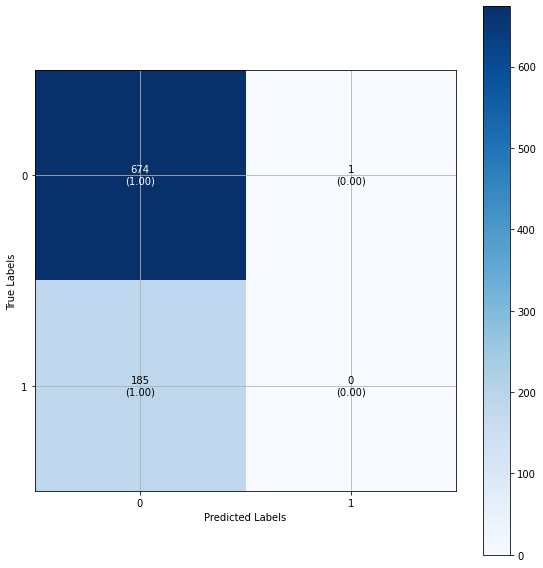

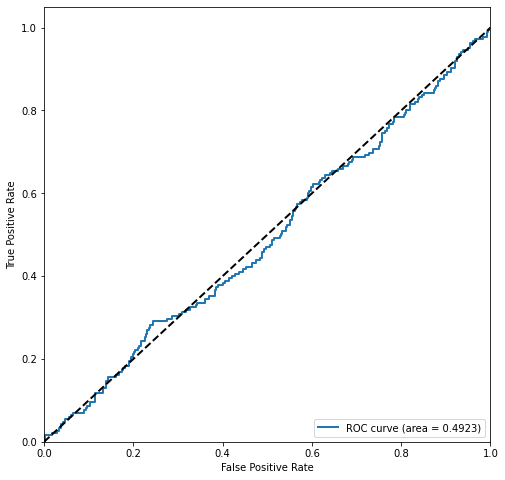

In [38]:
print("Accuracy Score on Test Set:")
# Inverse transform onehot labels using labelbinarizer
print(accuracy_score(y_test, y_pred_linear_svc))

# np.set_printoptions(precision=2)
# print(linear_svc_clf_final.classes_)
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_linear_svc, classes=linear_svc_clf_final.classes_)

# Plot ROC curve (requires onehot targets)
plot_roc_curve(y_test, y_score_linear_svc, classes=linear_svc_clf_final.classes_, roc_multilabel_count=2)

## Nonlinear Support Vector Classifier

In [143]:
# Specify hyperparameter grids for optimization

gamma = [x for x in np.logspace(-15, 3, base=2, num=7)]
gamma.append("scale")
gamma.append("auto")

svc_param_grid = {
    "svc_classifier__kernel": ["rbf"],#,"poly","sigmoid"],
#     "svc_classifier__degree": [3,4,5],
    "svc_classifier__C": [x for x in np.logspace(-5, 10, base=2, num=5)],
    "svc_classifier__gamma": gamma
}

svc_param_grid.update(param_grid)

In [144]:
# Nonlinear support Vector Classification using one-vs-one classification for multiclass learning
svc_clf = SVC(verbose=3)
svc_clf_fullpipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("svc_classifier", svc_clf)
])
print(svc_clf_fullpipe)
print("")

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('tweet_transformer',
                                                  Pipeline(memory=None,
                                                           steps=[('cleaner',
                                                                   Tweet_cleaner(verbose=False,
                                                                                 word2vec=False)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(analyzer='word',
                                                                                   binary=False,
                                                             

In [145]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict["SVC"] = (svc_clf_fullpipe, svc_param_grid)

### Train the Nonlinear SVC pipeline model

In [146]:
svc_clf_final = pipeline_fit(
                                X_train=X_train,
                                y_train=y_train,
                                pipeline="SVC", 
                                search_method="randomsearch", 
                                n_iter=3,
                                cv=3,
                                verbose_searchcv=2, 
                                n_jobs=-1, 
                                save_name=None
                            )

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('tweet_transformer',
                                                  Pipeline(memory=None,
                                                           steps=[('cleaner',
                                                                   Tweet_cleaner(verbose=False,
                                                                                 word2vec=False)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(analyzer='word',
                                                                                   binary=False,
                                                             

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   48.6s remaining:  2.8min
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:   48.6s remaining:   13.9s


KeyboardInterrupt: 

### Evaluation

In [ ]:
y_pred_svc = svc_clf_final.predict(X_test)
y_score_svc = svc_clf_final.decision_function(X_test)

In [ ]:
print("Accuracy Score on Test Set:")
print(accuracy_score(y_test, y_pred_svc))

# np.set_printoptions(precision=2)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_svc, classes=svc_clf_final.classes_)

# Plot ROC curve (requires onehot targets)
plot_roc_curve(y_test_onehot, y_score_svc, classes=svc_clf_final.classes_, roc_multilabel_count=2)

# Random Forest Classifier

In [39]:
# Linear support Vector Classification using one-vs-rest classification for multiclass learning
rf_clf = RandomForestClassifier(verbose=0)
rf_clf_fullpipe = Pipeline(steps=[
    ("text_preprocessor", text_preprocessor),
    ("rf_classifier", rf_clf)
])

print(rf_clf_fullpipe)
print("")

Pipeline(steps=[('text_preprocessor',
                 ColumnTransformer(transformers=[('text_transformer',
                                                  Pipeline(steps=[('text_to_numpy',
                                                                   Text_to_numpy()),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer())]),
                                                  ['text'])])),
                ('rf_classifier', RandomForestClassifier())])



In [40]:
# Specify hyperparameter grids for optimization

max_depth = [int(x) for x in np.linspace(10,110,11)]
max_depth.append(None)

gamma = [x for x in np.logspace(-15,3,base=2,num=7)]
gamma.append("scale")
gamma.append("auto")

rf_param_grid = {
    "rf_classifier__n_estimators": [int(x) for x in np.linspace(50,500,11)],
    "rf_classifier__max_depth": max_depth,
    "rf_classifier__max_features": ["auto"],
    "rf_classifier__min_samples_split": [2, 10, 100],
    "rf_classifier__min_samples_leaf": [1, 2, 4, 10],
    }


rf_param_grid.update(text_param_grid)

In [41]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {
    "RandomForest": (rf_clf_fullpipe, rf_param_grid),
}

### Train the random forest pipeline model

In [42]:
rf_clf_final = pipeline_fit(
                                X_train=X_train,
                                y_train=y_train,
                                pipeline="RandomForest", 
                                search_method="randomsearch", 
                                n_iter=30,
                                verbose_searchcv=2, 
                                n_jobs=6, 
                                save_name="News_test"
                            )

A joblib model file already exists with that name, 
do you wish to retrain the model? (Y/N) y


Pipeline(steps=[('text_preprocessor',
                 ColumnTransformer(transformers=[('text_transformer',
                                                  Pipeline(steps=[('text_to_numpy',
                                                                   Text_to_numpy()),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer())]),
                                                  ['text'])])),
                ('rf_classifier', RandomForestClassifier())])
Param Grid: {'rf_classifier__n_estimators': [50, 95, 140, 185, 230, 275, 320, 365, 410, 455, 500], 'rf_classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'rf_classifier__max_features': ['auto'], 'rf_classifier__min_samples_split': [2, 10, 100], 'rf_classifier__min_samples_leaf': [1, 2, 4, 10], 'text_preprocessor__text_transformer__tfidf_vectorizer__max_features': (1000, 5000, 15000), 'text_p

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done 150 out of 150 | elapsed:   19.3s finished



RandomForest:
Best Score:  0.767082294264339
Best Params:  {'text_preprocessor__text_transformer__tfidf_vectorizer__token_pattern': "(?u)\\b\\w\\w+\\b|\\'", 'text_preprocessor__text_transformer__tfidf_vectorizer__ngram_range': (1, 2), 'text_preprocessor__text_transformer__tfidf_vectorizer__max_features': 15000, 'text_preprocessor__text_transformer__tfidf_vectorizer__binary': True, 'rf_classifier__n_estimators': 95, 'rf_classifier__min_samples_split': 10, 'rf_classifier__min_samples_leaf': 10, 'rf_classifier__max_features': 'auto', 'rf_classifier__max_depth': 100}


### Evaluation

In [43]:
y_pred_rf = rf_clf_final.predict(X_test)
y_score_rf = rf_clf_final.predict_proba(X_test)
# print(y_score_rf)

Accuracy Score on Test Set:
0.7848837209302325


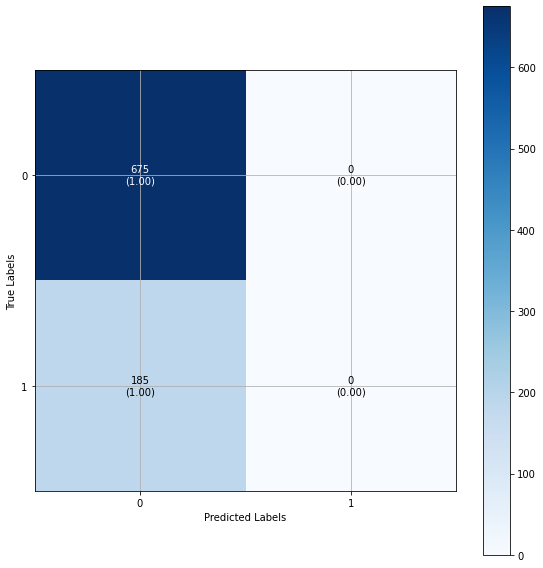

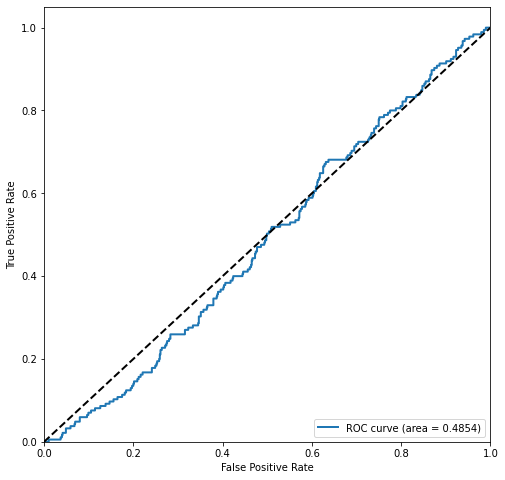

In [44]:
print("Accuracy Score on Test Set:")
# Inverse transform onehot labels using labelbinarizer
print(accuracy_score(y_test, y_pred_rf))

# np.set_printoptions(precision=2)
# print(linear_svc_clf_final.classes_)
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, classes=rf_clf_final.classes_)

# Plot ROC curve (requires onehot targets)
plot_roc_curve(y_test, y_score_rf, classes=rf_clf_final.classes_, roc_multilabel_count=2)

# Gradient Boosting Classifiers

## Sklearn Gradient Boosting

In [45]:
# Linear support Vector Classification using one-vs-rest classification for multiclass learning
gb_clf = GradientBoostingClassifier(verbose=0)
gb_clf_fullpipe = Pipeline(steps=[
    ("text_preprocessor", text_preprocessor),
    ("gb_classifier", gb_clf)
])
print(gb_clf_fullpipe)
print("")

Pipeline(steps=[('text_preprocessor',
                 ColumnTransformer(transformers=[('text_transformer',
                                                  Pipeline(steps=[('text_to_numpy',
                                                                   Text_to_numpy()),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer())]),
                                                  ['text'])])),
                ('gb_classifier', GradientBoostingClassifier())])



In [46]:
# Specify hyperparameter grids for optimization

max_depth = [int(x) for x in np.linspace(10,110,11)]
max_depth.append(None)

gb_param_grid = {
    "gb_classifier__n_estimators": [int(x) for x in np.linspace(50,500,11)],
    "gb_classifier__max_depth": max_depth
    }

gb_param_grid.update(text_param_grid)

In [47]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {
    "GradientBoost": (gb_clf_fullpipe, gb_param_grid),
}

### Train the gradient boosting pipeline model

In [48]:
gb_clf_final = pipeline_fit(
                                X_train=X_train,
                                y_train=y_train,
                                pipeline="GradientBoost", 
                                search_method="randomsearch", 
                                n_iter=5,
                                verbose_searchcv=2, 
                                n_jobs=10, 
                                save_name="News_test"
                            )

A joblib model file already exists with that name, 
do you wish to retrain the model? (Y/N) y


Pipeline(steps=[('text_preprocessor',
                 ColumnTransformer(transformers=[('text_transformer',
                                                  Pipeline(steps=[('text_to_numpy',
                                                                   Text_to_numpy()),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer())]),
                                                  ['text'])])),
                ('gb_classifier', GradientBoostingClassifier())])
Param Grid: {'gb_classifier__n_estimators': [50, 95, 140, 185, 230, 275, 320, 365, 410, 455, 500], 'gb_classifier__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'text_preprocessor__text_transformer__tfidf_vectorizer__max_features': (1000, 5000, 15000), 'text_preprocessor__text_transformer__tfidf_vectorizer__binary': [True], 'text_preprocessor__text_transformer__tfidf_vectorizer__token_pattern':

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  19 out of  25 | elapsed:  1.8min remaining:   33.1s
[Parallel(n_jobs=10)]: Done  25 out of  25 | elapsed:  3.7min finished



GradientBoost:
Best Score:  0.7386533665835413
Best Params:  {'text_preprocessor__text_transformer__tfidf_vectorizer__token_pattern': "(?u)\\b\\w\\w+\\b|\\'", 'text_preprocessor__text_transformer__tfidf_vectorizer__ngram_range': (1, 2), 'text_preprocessor__text_transformer__tfidf_vectorizer__max_features': 1000, 'text_preprocessor__text_transformer__tfidf_vectorizer__binary': True, 'gb_classifier__n_estimators': 185, 'gb_classifier__max_depth': 50}


### Evaluation

In [49]:
y_pred_gb = gb_clf_final.predict(X_test)
y_score_gb = gb_clf_final.decision_function(X_test)

Accuracy Score on Test Set:
0.7453488372093023


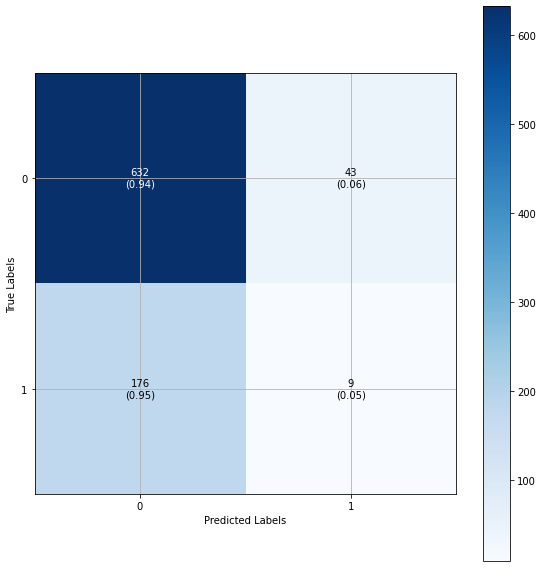

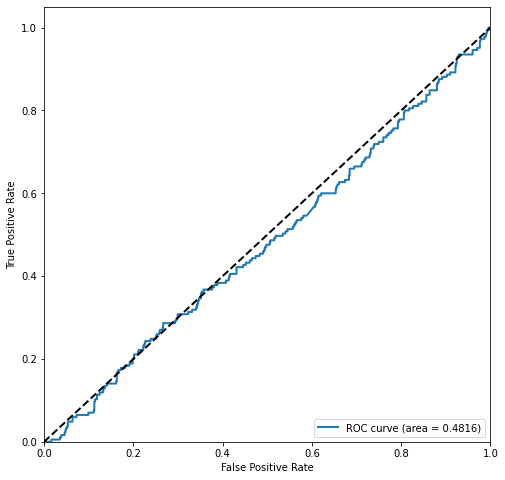

In [50]:
print("Accuracy Score on Test Set:")
# Inverse transform onehot labels using labelbinarizer
print(accuracy_score(y_test, y_pred_gb))

# np.set_printoptions(precision=2)
# print(linear_svc_clf_final.classes_)
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_gb, classes=gb_clf_final.classes_)

# Plot ROC curve (requires onehot targets)
plot_roc_curve(y_test, y_score_gb, classes=gb_clf_final.classes_, roc_multilabel_count=2)

## XGBoost Classifier

In [51]:
# Linear support Vector Classification using one-vs-rest classification for multiclass learning
xgb_clf = XGBClassifier()
xgb_clf_fullpipe = Pipeline(steps=[
    ("text_preprocessor", text_preprocessor),
    ("xgb_classifier", xgb_clf)
])
print(xgb_clf_fullpipe)
print("")

Pipeline(steps=[('text_preprocessor',
                 ColumnTransformer(transformers=[('text_transformer',
                                                  Pipeline(steps=[('text_to_numpy',
                                                                   Text_to_numpy()),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer())]),
                                                  ['text'])])),
                ('xgb_classifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               import...e='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                              

In [52]:
# Specify hyperparameter grids for optimization
max_depth = [int(x) for x in np.linspace(10,110,11)]
max_depth.append(None)

xgb_param_grid = {
    "xgb_classifier__n_estimators": [int(x) for x in np.linspace(50,550,11)],
    "xgb_classifier__max_depth": max_depth,  
    }

xgb_param_grid.update(text_param_grid)

In [53]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {
    "XGBoost": (xgb_clf_fullpipe, xgb_param_grid),
}

### Train the gradient boosting pipeline model

In [54]:
xgb_clf_final = pipeline_fit(
                                X_train=X_train,
                                y_train=y_train,
                                pipeline="XGBoost", 
                                search_method="randomsearch", 
                                n_iter=5,
                                verbose_searchcv=2, 
                                n_jobs=10, 
                                save_name="Text_test"
                            )

A joblib model file already exists with that name, 
do you wish to retrain the model? (Y/N) y


Pipeline(steps=[('text_preprocessor',
                 ColumnTransformer(transformers=[('text_transformer',
                                                  Pipeline(steps=[('text_to_numpy',
                                                                   Text_to_numpy()),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer())]),
                                                  ['text'])])),
                ('xgb_classifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               import...e='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                              

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  19 out of  25 | elapsed:   20.0s remaining:    6.3s
[Parallel(n_jobs=10)]: Done  25 out of  25 | elapsed:   25.3s finished
D:\Users\Michael\anaconda3\envs\ml_nlp\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:56:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

XGBoost:
Best Score:  0.7326683291770574
Best Params:  {'xgb_classifier__n_estimators': 50, 'xgb_classifier__max_depth': 90, 'text_preprocessor__text_transformer__tfidf_vectorizer__token_pattern': "(?u)\\b\\w\\w+\\b|\\'", 'text_preprocessor__text_transformer__tfidf_vectorizer__ngram_range': (1, 2), 'text_preprocessor__text_transformer__tfidf_vectorizer__max_features': 5000, 'text_preprocessor__text_transformer__tfidf_vectorizer__binary': True}


### Evaluation

In [55]:
y_pred_xgb = xgb_clf_final.predict(X_test)
y_score_xgb = xgb_clf_final.predict_proba(X_test)

Accuracy Score on Test Set:
0.7430232558139535


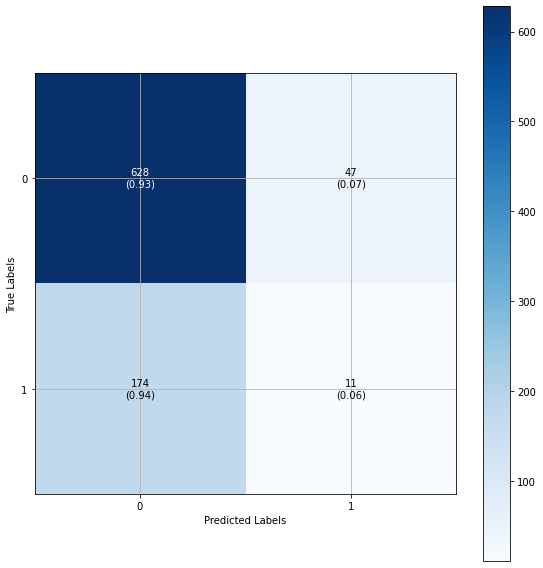

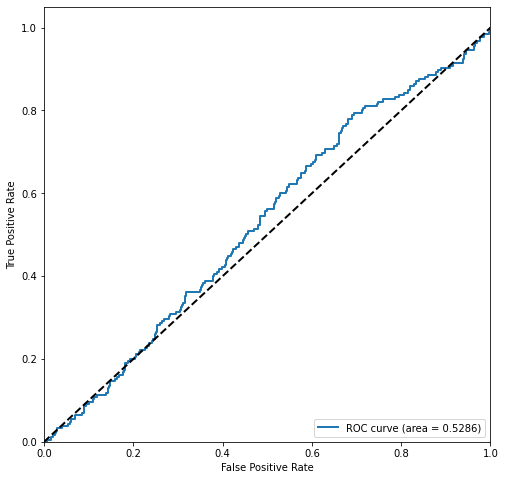

In [56]:
print("Accuracy Score on Test Set:")
# Inverse transform onehot labels using labelbinarizer
print(accuracy_score(y_test, y_pred_xgb))

# np.set_printoptions(precision=2)
# print(linear_svc_clf_final.classes_)
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_xgb, classes=xgb_clf_final.classes_)

# Plot ROC curve (requires onehot targets)
plot_roc_curve(y_test, y_score_xgb, classes=xgb_clf_final.classes_, roc_multilabel_count=2)

## LightGBM Classifier

In [20]:
# Linear support Vector Classification using one-vs-rest classification for multiclass learning
lgbm_clf = XGBClassifier()
lgbm_clf_fullpipe = Pipeline(steps=[
    ("text_preprocessor", text_preprocessor),
    ("lgbm_classifier", lgbm_clf)
])
print(lgbm_clf_fullpipe)
print("")

Pipeline(steps=[('text_preprocessor',
                 ColumnTransformer(transformers=[('text_transformer',
                                                  Pipeline(steps=[('text_to_numpy',
                                                                   Text_to_numpy()),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer())]),
                                                  ['text'])])),
                ('lgbm_classifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               impor...e='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                              

In [22]:
# Specify hyperparameter grids for optimization

max_depth = [int(x) for x in np.linspace(10,110,11)]
max_depth.append(None)

lgbm_param_grid = {
    "lgbm_classifier__n_estimators": [int(x) for x in np.linspace(50,550,11)],
    "lgbm_classifier__max_depth": max_depth,
    }

lgbm_param_grid.update(text_param_grid)

In [23]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {
    "LightGBM": (lgbm_clf_fullpipe, lgbm_param_grid),
}

### Train the gradient boosting pipeline model

In [24]:
lgbm_clf_final = pipeline_fit(
                                X_train=X_train,
                                y_train=y_train,
                                pipeline="LightGBM", 
                                search_method="randomsearch", 
                                n_iter=50,
                                verbose_searchcv=1, 
                                n_jobs=10, 
                                save_name="News_test"
                            )

Pipeline(steps=[('text_preprocessor',
                 ColumnTransformer(transformers=[('text_transformer',
                                                  Pipeline(steps=[('text_to_numpy',
                                                                   Text_to_numpy()),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer())]),
                                                  ['text'])])),
                ('lgbm_classifier',
                 XGBClassifier(base_score=None, booster=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, gamma=None, gpu_id=None,
                               impor...e='gain',
                               interaction_constraints=None, learning_rate=None,
                               max_delta_step=None, max_depth=None,
                              

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   26.6s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  2.4min
[Parallel(n_jobs=10)]: Done 250 out of 250 | elapsed:  3.3min finished
D:\Users\Michael\anaconda3\envs\ml_nlp\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

LightGBM:
Best Score:  0.7416458852867831
Best Params:  {'text_preprocessor__text_transformer__tfidf_vectorizer__token_pattern': "(?u)\\b\\w\\w+\\b|\\'", 'text_preprocessor__text_transformer__tfidf_vectorizer__ngram_range': (1, 2), 'text_preprocessor__text_transformer__tfidf_vectorizer__max_features': 1000, 'text_preprocessor__text_transformer__tfidf_vectorizer__binary': True, 'lgbm_classifier__n_estimators': 150, 'lgbm_classifier__max_depth': 110}


### Evaluation

In [26]:
y_pred_lgbm = lgbm_clf_final.predict(X_test)
y_score_lgbm = lgbm_clf_final.predict_proba(X_test)

Accuracy Score on Test Set:
0.736046511627907


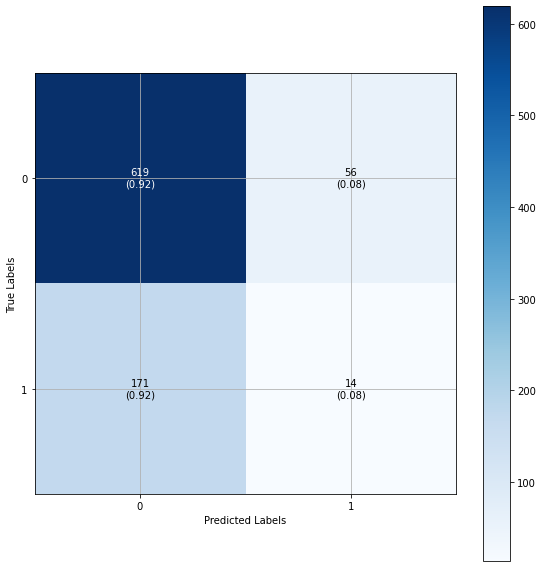

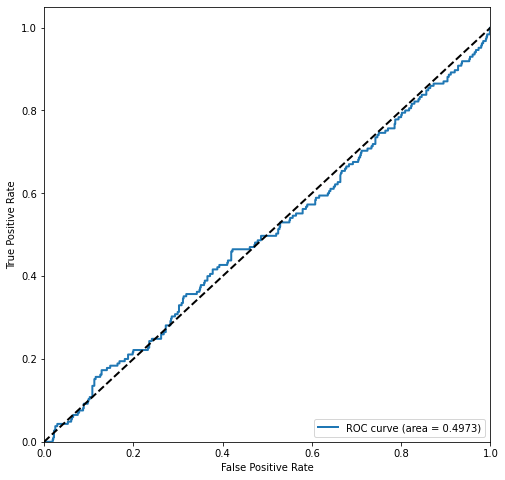

In [27]:
print("Accuracy Score on Test Set:")
# Inverse transform onehot labels using labelbinarizer
print(accuracy_score(y_test, y_pred_lgbm))

# np.set_printoptions(precision=2)
# print(linear_svc_clf_final.classes_)
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_lgbm, classes=lgbm_clf_final.classes_)

# Plot ROC curve (requires onehot targets)
plot_roc_curve(y_test, y_score_lgbm, classes=lgbm_clf_final.classes_, roc_multilabel_count=2)

# Neural Networks

## Tokenizer and embedding pipeline transformer

In [21]:
## Keras tokenizing function and optional word2vec embedding transformer
class Keras_tokenizer_embedding_transfomer(BaseEstimator, TransformerMixin):
    
    def __init__(self, verbose=False, word2vec=None, text_col=None, max_words=None, max_seq_len=None, vector_size=None):
        self.verbose = verbose
        self.word2vec = word2vec
        self.text_col = text_col
        self.max_words = max_words
        self.max_seq_len = max_seq_len
        self.vector_size = vector_size
        
    def fit(self, X, y=None):
        if(self.verbose):
            print("Verbose mode on!")
        return self
    
    
#     def preprocess_text(self, text: Union[Iterable, str]) -> List[str]:
# #         """ Prepare text for the model, excluding unknown words"""
# #         if not isinstance(raw_text, list):
# #             if not isinstance(raw_text, str):
# #                 raise TypeError(
# #                     f"Input should be a str or a list of str, got {type(raw_text)}"
# #                 )
# #             raw_tokens = raw_text.split()
#         for token in text:
#             return list(filter(lambda x: x in self.word2vec.vocab, token))
    
    
    
    ## Slight modification of zeugma source code
    def transform_text(self, text: Union[Iterable, str]) -> np.array:
        """ Compute an aggregate embedding vector for an input str or iterable of str.
        """
#         tokens = self.preprocess_text(text)
        embedding = []
        for token in text:
#             print(token)
            try:
                embedding.append(self.word2vec[token])
            except: 
                embedding.append(np.zeros(self.vector_size, dtype=np.float32))
        
        return embedding

#         if not tokens:
#             return np.zeros(self.vector_size, dtype=np.float32)

#         return self.word2vec[tokens]
    
    
    
    def transform(self, X, y=None):
        X = X[text_col].values
        self.text_count = len(X)
        #display(X)
        ## Use Keras tokenizer and padding for neural net inputs        
        if self.word2vec is not None:
            print("Transforming texts...")
            print(X.shape)
            
#             print(X[:5])
            
            X = [list(text.split()) for text in X]
#             print(X[:5])

            X = pad_sequences(X, maxlen=self.max_seq_len, padding="post", truncating="post", value=" ", dtype=object)
            print("First 5 padded texts:")
            print(X[:5])
            
            ## Conversion to word vectors, modification of Zeugma
            X = np.reshape([self.transform_text(text) for text in X], (self.text_count, self.max_seq_len, self.vector_size))
            
            ## Print number of words found in data texts but not in word2vec pre-trained model
#             print("Proportion of words in dataset not found in pre-trained model:")
#             known_word_count = np.count_nonzero(np.count_nonzero(X, axis=1))
#             print(nonzero_elements / vocab_size)
            
            
#             print(embeddings[0])
#             print(embeddings.shape)
            
            ## Pad each text array to the same length (post), a modification of keras pad_sequences
#             num_samples = len(embeddings)
#             lengths = []
#             sample_shape = ()
#             flag = True
            
#             for text in embeddings:
#                 try:
#                     lengths.append(len(embeddings))
#                     if flag and len(embeddings):
#                         sample_shape = np.asarray(embeddings).shape[1:]
#                         flag = False
#                 except TypeError:
#                     raise ValueError('`sequences` must be a list of iterables. '
#                                      'Found non-iterable: ' + str(embeddings))

#             embeddings = np.full((num_samples, self.vector_size) + sample_shape, np.zeros(self.vector_size,))
            
#             for idx, s in enumerate(embeddings):
#                 trunc = s[:self.vector_size]
                
#                 # check `trunc` has expected shape
#                 trunc = np.asarray(trunc)
#                 if trunc.shape[1:] != sample_shape:
#                     raise ValueError('Shape of sample %s of sequence at position %s '
#                                      'is different from expected shape %s' %
#                                      (trunc.shape[1:], idx, sample_shape))
#                 embeddings[idx, :len(trunc)] = trunc 
            
#             print(embeddings[:5])
            
#             print(embeddings.shape)
            print("Texts transformed")
            
            ## Stack arrays into large three-dimensional array
#             X = np.vstack(embeddings)
#             del embeddings
            
            print("Shape of transformed text data:", X.shape)
            print("Transformation Complete")
#             print(X[0])
#             print(X[0].shape)
            
        else:
            print("Tokenizing...")
    #         X = X[self.text_col].to_numpy()
            tokenizer = Tokenizer(num_words=self.max_words)
            tokenizer.fit_on_texts(X)

            sequences = tokenizer.texts_to_sequences(X)
            word_index = tokenizer.word_index
            print("%s unique tokens" % len(word_index))

            X = pad_sequences(sequences, maxlen=self.max_seq_len)
            print("Shape of tokenized text data:", X.shape)
            print("Tokenization Complete")
            
            
#             print("Preparing embedding matrix...")
            
#             nb_words = min(max_words, len(word_index))+1

#             embedding_matrix = np.zeros((nb_words, embedding_dim))
#             for word, i in word_index.items():
#                 if word in word2vec.vocab:
#                     embedding_matrix[i] = word2vec.word_vec(word)
#             print("Null word embeddings: %d" % np.sum(np.sum(embedding_matrix, axis=1) == 0))
#             print("Embedding matrix formation complete")
            
            

        return X

In [ ]:
# def create_embedding_matrix(filepath, word_index, embedding_dim):
#     vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
#     embedding_matrix = np.zeros((vocab_size, embedding_dim))

#     with open(filepath) as f:
#         for line in f:
#             word, *vector = line.split()
#             if word in word_index:
#                 idx = word_index[word] 
#                 embedding_matrix[idx] = np.array(
#                     vector, dtype=np.float32)[:embedding_dim]

#     return embedding_matrix

In [ ]:
# embedding_dim = 50
# embedding_matrix = create_embedding_matrix(
# 'data/glove_word_embeddings/glove.6B.50d.txt',
# tokenizer.word_index, embedding_dim)

In [ ]:
# model = Sequential()
# model.add(layers.Embedding(vocab_size, embedding_dim, 
#                            weights=[embedding_matrix], 
#                            input_length=maxlen, 
#                            trainable=False))
# model.add(layers.GlobalMaxPool1D())
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# model.summary()

## Get pretrained word vectors and set param grid

In [22]:
## Load word vectors
while "word2vec" in globals():
    # Check if word2vec model is already loaded, ask user for confirmation of overwrite
    skip = input('''A word2vec model is already loaded, 
do you reload the model? (Y/N)''')
    if skip.lower().strip() == "y":
        print("Loading word2vec model...")
        word2vec = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
        print(type(word2vec))
        print("Found %s word vectors of word2vec" % len(word2vec.vocab))
    elif skip.lower().strip() == "n":
        print(type(word2vec))
        print("Found %s word vectors of word2vec" % len(word2vec.vocab))
        break
else:
    print("Loading word2vec model...")
    word2vec = KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary=True)
    print(type(word2vec))
    print("Found %s word vectors of word2vec" % len(word2vec.vocab))

Loading word2vec model...
<class 'gensim.models.keyedvectors.Word2VecKeyedVectors'>
Found 3000000 word vectors of word2vec


In [23]:
## Get the length of a word vector
vector_size = word2vec.vector_size
print(vector_size)
# len(word2vec["computer"])

300


In [31]:
# embedding_layer = word2vec.get_keras_embedding(train_embeddings=True)
# embedding_layer.mask_zero = True
# print(embedding_layer)

# w2vindex = {}
# for index, word in enumerate(word2vec.index2word):
#     w2vindex[word] = index
    
# print(w2vindex["computer"])
# print()

1279


In [32]:
# embedding_weights = np.vstack([
#            np.zeros(word2vec.vectors.shape[1]),
#            word2vec.vectors
# ])

# print(embedding_weights.shape)

(3000001, 300)


In [24]:
max_seq_len = 100
max_words = None
text_col = "text"

# tweet_transformer_keras = Pipeline(steps=[
# #    ("cleaner", Tweet_cleaner(word2vec=word2vec)),
# #    ("keras_tokenizer", Keras_tokenizer(max_seq_len=max_seq_len)),
#    ("keras_tokenizer_embedding_transfomer", Keras_tokenizer_embedding_transfomer(word2vec=word2vec, max_words=max_words, max_seq_len=max_seq_len, vector_size=vector_size))
#    ])

text_transformer_keras = Pipeline(steps=[
#    ("cleaner", Tweet_cleaner(word2vec=word2vec)),
#    ("keras_tokenizer", Keras_tokenizer(max_seq_len=max_seq_len)),
   ("keras_tokenizer_embedding_transfomer", Keras_tokenizer_embedding_transfomer(word2vec=word2vec, max_words=max_words, max_seq_len=max_seq_len, vector_size=vector_size))
   ])

# preprocessor_keras = ColumnTransformer(
#    transformers=[
#        ("tweet_transformer_keras", tweet_transformer_keras, tweet_col)
#        ])

text_preprocessor_keras = ColumnTransformer(
   transformers=[
       ("text_transformer_keras", text_transformer_keras, text_col)
       ])

## Keras Dense Neural Network

In [68]:
## Set callbacks for Keras model
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)
metrics = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

## Keras sklearn pipeline wrapper, dense layers require row major arrays
def create_dense_keras(input_shape=(max_seq_len,vector_size,),n_nodes_1=50,n_nodes_2=10,dropout=0.3,output_size=1,loss="binary_crossentropy",optimizer="adam",metrics=metrics,callbacks=[es]):
    
    print("-"*32)
    print("create_dense_fn called with:")
    print("\tInput Shape:", input_shape)
    print("\tDropout:", dropout)
    print("\tOutput Size:", output_size)
    print("\tLoss:", loss)
    print("\tOptimizer:", optimizer)
    print("\tMetrics:", metrics)
    print("\tCallbacks:", callbacks)
    print("-"*32)

    model = Sequential()
    
    model.add(layers.Conv1D(filters=vector_size, kernel_size=3, input_shape=input_shape, activation="relu")) 
    model.add(layers.MaxPooling1D(pool_size=4))
    model.add(layers.Dropout(rate=dropout))
    model.add(layers.LSTM(n_nodes_1, activation="relu"))

#     model.add(layers.Dense(n_nodes_1, input_shape=input_shape, activation="relu"))

#     model.add(layers.Dense(n_nodes_2, activation="relu"))
#     model.add(layers.Dropout(rate=dropout))
    model.add(layers.Dense(output_size, activation="sigmoid"))

    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=metrics)

    print(model.summary())
    return model

In [69]:
# Dense neural net classification
dense_keras_clf = KerasClassifier(build_fn=create_dense_keras, verbose=1, batch_size=16, epochs=10) # wrap the model

# Specify Keras callbacks for early stopping and checkpoints
# calls = [ModelCheckpoint(, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")]
    
dense_keras_clf_fullpipe = Pipeline(steps=[
    ("text_preprocessor", text_transformer_keras),#preprocessor_keras),
#     ("debug", Debug()),
    ("keras_estimator", dense_keras_clf)
])
print(dense_keras_clf_fullpipe)
print("")

Pipeline(steps=[('text_preprocessor',
                 Pipeline(steps=[('keras_tokenizer_embedding_transfomer',
                                  Keras_tokenizer_embedding_transfomer(max_seq_len=100,
                                                                       vector_size=300,
                                                                       word2vec=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x00000170274917C0>))])),
                ('keras_estimator',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001711FAC4940>)])



In [70]:
# Specify hyperparameter grids for optimization
dense_keras_param_grid = {
#     "keras_estimator__optimizer":["adam"],#["rmsprop","adam","adagrad"],
    "keras_estimator__epochs":[10,20,45,60],
    "keras_estimator__n_nodes_1":[5,10,20,50],
    "keras_estimator__n_nodes_2":[5,10,20,50],
#     "keras_estimator__dropout":[0.4,0.55,0.7]
#     "keras_estimator_input_shape":[(dense_keras_clf_fullpipe.named_steps["debug"].shape[1],)]
}

dense_keras_param_grid.update(text_param_grid)

In [71]:
# Dictionary of pipelines and classifier types for ease of reference
try:
    pipe_dict["Dense_Keras"] = (dense_keras_clf_fullpipe, dense_keras_param_grid)   
except NameError:
    pipe_dict = {
    "Dense_Keras": (dense_keras_clf_fullpipe, dense_keras_param_grid),
    }

### Train the dense neural network pipeline model

In [73]:
dense_keras_clf_final = pipeline_fit(
                                        X_train=X_train,
                                        y_train=y_train,
                                        pipeline="Dense_Keras", 
                                        search_method=None,#"gridsearch",
                                        keras_nn=True,
                                        n_jobs=1,
                                        verbose_searchcv=1,  
                                        save_name="News_test"
                                    )

A joblib model file already exists with that name, 
do you wish to retrain the model? (Y/N) y


No hyperparameter optimization
Training Dense_Keras on 2005 samples...
('keras_estimator', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x000001711FAC4940>)
Transforming texts...
(2005,)
First 5 padded texts:
[['salaam' 'smeasim' 'another' 'iraqi' 'known' 'years' '55' 'candidate'
  'largest' 'shiite' 'opposition' 'party' 'iraqi' 'national' 'alliance'
  'salaam' 'wears' 'veil' 'coalition' 'includes' 'many' 'sadrists'
  'relations' 'iran' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['violence' 'continued' 'roil' 'capital' 'tuesday' 'high-ranking'
  'official' 'interior' 'ministry' 'narrowly' 'escaped' 'assassination'
  'attempt' 'gunmen' 'fired' 'car' 'killing' 'one' 'bodyguards'
  'wounding' 't

### Evaluation

In [74]:
# dense_keras_clf_final.named_steps["keras_estimator"].model = load_model(save_name+"_"+pipeline+".h5")

y_pred_dense_keras = dense_keras_clf_final.predict(X_test)
y_score_dense_keras = dense_keras_clf_final.predict_proba(X_test)

Transforming texts...
(860,)
First 5 padded texts:
[['we' 'believe' 'iraq' 'unity' 'sovereignty' 'independence' 'said'
  'reference' 'unity' 'slap' 'mr' 'hakim' 'supreme' 'council'
  'encouraged' 'provinces' 'form' 'regions' 'that' 'constitution' 'could'
  'considerable' 'independence' 'baghdad' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['first' 'time' 'shiite' 'political' 'leaders' 'traveled' 'anbar' 'meet'
  'sunni' 'coalition' 'gathering' 'sheiks' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' '

D:\Users\Michael\anaconda3\envs\ml_nlp\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


54/54 [==============================] - 1s 7ms/step
Transforming texts...
(860,)
First 5 padded texts:
[['we' 'believe' 'iraq' 'unity' 'sovereignty' 'independence' 'said'
  'reference' 'unity' 'slap' 'mr' 'hakim' 'supreme' 'council'
  'encouraged' 'provinces' 'form' 'regions' 'that' 'constitution' 'could'
  'considerable' 'independence' 'baghdad' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['first' 'time' 'shiite' 'political' 'leaders' 'traveled' 'anbar' 'meet'
  'sunni' 'coalition' 'gathering' 'sheiks' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
  ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' 

D:\Users\Michael\anaconda3\envs\ml_nlp\lib\site-packages\tensorflow\python\keras\engine\sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


54/54 [==============================] - 0s 7ms/step


In [75]:
print(y_pred_dense_keras.shape)

(860, 1)


Accuracy Score on Test Set:
0.6941860465116279


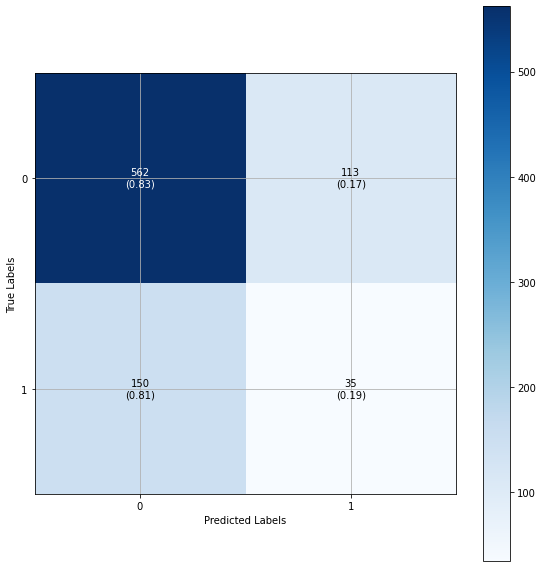

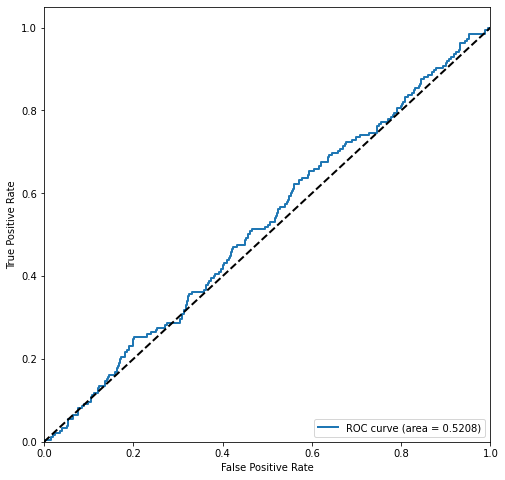

In [76]:
print("Accuracy Score on Test Set:")
print(accuracy_score(y_test, y_pred_dense_keras))

# np.set_printoptions(precision=2)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_dense_keras, classes=dense_keras_clf_final.classes_)

# Plot ROC curve (requires onehot targets)
plot_roc_curve(y_test, y_score_dense_keras[:,1], classes=dense_keras_clf_final.classes_, roc_multilabel_count=2)

## Keras LSTM Neural Network

In [ ]:
# weight_val = np.ones(len(labels_val))
# if re_weight:
#     weight_val *= 0.472001959
#     weight_val[labels_val==0] = 1.309028344

# ########################################
# ## define the model structure
# ########################################

# MAX_SEQUENCE_LENGTH = 30
# MAX_NB_WORDS = 200000
# EMBEDDING_DIM = 300
# VALIDATION_SPLIT = 0.1

# num_lstm = np.random.randint(175, 275)
# num_dense = np.random.randint(100, 150)
# rate_drop_lstm = 0.15 + np.random.rand() * 0.25
# rate_drop_dense = 0.15 + np.random.rand() * 0.25

# re_weight = True # whether to re-weight classes to fit the 17.5% share in test set

# STAMP = 'lstm_%d_%d_%.2f_%.2f'%(num_lstm, num_dense, rate_drop_lstm, \
#         rate_drop_dense)


# embedding_layer = Embedding(nb_words,
#         EMBEDDING_DIM,
#         weights=[embedding_matrix],
#         input_length=MAX_SEQUENCE_LENGTH,
#         trainable=False)
# lstm_layer = LSTM(num_lstm, dropout=rate_drop_lstm, recurrent_dropout=rate_drop_lstm)

# sequence_1_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# embedded_sequences_1 = embedding_layer(sequence_1_input)
# x1 = lstm_layer(embedded_sequences_1)

# sequence_2_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# embedded_sequences_2 = embedding_layer(sequence_2_input)
# y1 = lstm_layer(embedded_sequences_2)

# merged = concatenate([x1, y1])
# merged = Dropout(rate_drop_dense)(merged)
# merged = BatchNormalization()(merged)

# merged = Dense(num_dense, activation=act)(merged)
# merged = Dropout(rate_drop_dense)(merged)
# merged = BatchNormalization()(merged)

# preds = Dense(1, activation='sigmoid')(merged)

# ########################################
# ## add class weight
# ########################################
# if re_weight:
#     class_weight = {0: 1.309028344, 1: 0.472001959}
# else:
#     class_weight = None

# ########################################
# ## train the model
# ########################################
# model = Model(inputs=[sequence_1_input, sequence_2_input], \
#         outputs=preds)
# model.compile(loss='binary_crossentropy',
#         optimizer='nadam',
#         metrics=['acc'])
# #model.summary()
# print(STAMP)

# early_stopping =EarlyStopping(monitor='val_loss', patience=3)
# bst_model_path = STAMP + '.h5'
# model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

# hist = model.fit([data_1_train, data_2_train], labels_train, \
#         validation_data=([data_1_val, data_2_val], labels_val, weight_val), \
#         epochs=200, batch_size=2048, shuffle=True, \
#         class_weight=class_weight, callbacks=[early_stopping, model_checkpoint])

# model.load_weights(bst_model_path)
# bst_val_score = min(hist.history['val_loss'])

In [34]:
## Set callbacks for Keras model
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5)

## Keras sklearn pipeline wrapper, dense layers require row major arrays
def create_lstm_keras(input_shape=(max_seq_len,vector_size,),output_size=1,dropout=0.7,loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"],callbacks=[es]):

    model = Sequential()
    
    model.add(layers.LSTM(50, input_shape=input_shape, activation="relu"))
#     model.add(layers.Dropout(rate=dropout))
#     model.add(layers.(10, activation="relu"))
#     model.add(layers.Dropout(rate=dropout))
    model.add(layers.Dense(output_size, activation="sigmoid"))
    
    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=metrics)

    return model

In [39]:
# Dense neural net classification
lstm_keras_clf = KerasClassifier(build_fn=create_lstm_keras, verbose=1, batch_size=128, epochs=20) # wrap the model

# Specify Keras callbacks for early stopping and checkpoints
# calls = [ModelCheckpoint(, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")]
    
lstm_keras_clf_fullpipe = Pipeline(steps=[
    ("preprocessor", tweet_transformer_keras),#preprocessor_keras),
#     ("debug", Debug()),
    ("keras_estimator", lstm_keras_clf)
])
print(lstm_keras_clf_fullpipe)
print("")

Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('keras_tokenizer_embedding_transfomer',
                                  Keras_tokenizer_embedding_transfomer(max_seq_len=30,
                                                                       max_words=None,
                                                                       text_col=None,
                                                                       vector_size=300,
                                                                       verbose=False,
                                                                       word2vec=<gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x7f6537a0e7f0>))],
                          verbose=False)),
                ('keras_estimator',
                 <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f602c9d6250>)],
         verbose=False)



In [40]:
# Specify hyperparameter grids for optimization
lstm_keras_param_grid = {
    "keras_estimator__optimizer":["adam"],#["rmsprop","adam","adagrad"],
    "keras_estimator__epochs":[10,20,45,60],
    "keras_estimator__dropout":[0.4,0.55,0.7]
}

lstm_keras_param_grid.update(param_grid)

In [41]:
# Dictionary of pipelines and classifier types for ease of reference
try:
    pipe_dict["LSTM_Keras"] = (lstm_keras_clf_fullpipe, lstm_keras_param_grid)   
except NameError:
    pipe_dict = {
    "LSTM_Keras": (lstm_keras_clf_fullpipe, lstm_keras_param_grid),
    }

### Train the LSTM neural network pipeline model

In [42]:
lstm_keras_clf_final = pipeline_fit(
                                        X_train=X_train,
                                        y_train=y_train,
                                        pipeline="LSTM_Keras", 
                                        search_method=None,#"gridsearch",
                                        keras_nn=True,
                                        n_jobs=6,
                                        verbose_searchcv=1,  
                                        save_name="Twitter_LSTM"
                                    )

No hyperparameter optimization
Training LSTM_Keras on 112000 samples...
('keras_estimator', <tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f602c9d6250>)
Transforming texts...
(112000,)
Texts transformed
Shape of transformed text data: (112000, 30, 300)
[[ 0.02404785  0.31445312 -0.02624512 ...  0.01525879  0.06494141
   0.14257812]
 [ 0.10351562  0.13769531 -0.00297546 ...  0.04394531 -0.14550781
   0.07128906]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Epoch 1/20
875/875 [==============================] - 15s 17ms/step - loss: 0.5395 - accuracy: 0.7204
Epoch 2/20
875/875 [==============================] - 14s 16ms/step - loss: 0.4525 - accuracy: 0.7897
Epoch 3/20
875/875 [==============================] - 

### Evaluation

In [43]:
# dense_keras_clf_final.named_steps["keras_estimator"].model = load_model(save_name+"_"+pipeline+".h5")

y_pred_lstm_keras = lstm_keras_clf_final.predict(X_test)
y_score_lstm_keras = lstm_keras_clf_final.predict_proba(X_test)

Transforming texts...
(48000,)
Texts transformed
Shape of transformed text data: (48000, 30, 300)
[[-0.47851562 -0.23242188 -0.14746094 ... -0.07763672 -0.23242188
   0.1875    ]
 [ 0.00704956 -0.07324219  0.171875   ...  0.01123047  0.1640625
   0.10693359]
 [ 0.06298828  0.18457031 -0.04760742 ...  0.13671875  0.16894531
  -0.10009766]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


375/375 [==============================] - 3s 7ms/step
Transforming texts...
(48000,)
Texts transformed
Shape of transformed text data: (48000, 30, 300)
[[-0.47851562 -0.23242188 -0.14746094 ... -0.07763672 -0.23242188
   0.1875    ]
 [ 0.00704956 -0.07324219  0.171875   ...  0.01123047  0.1640625
   0.10693359]
 [ 0.06298828  0.18457031 -0.04760742 ...  0.13671875  0.16894531
  -0.10009766]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Instructions for updating:
Please use `model.predict()` instead.


Instructions for updating:
Please use `model.predict()` instead.


375/375 [==============================] - 3s 7ms/step


Accuracy Score on Test Set:
0.791


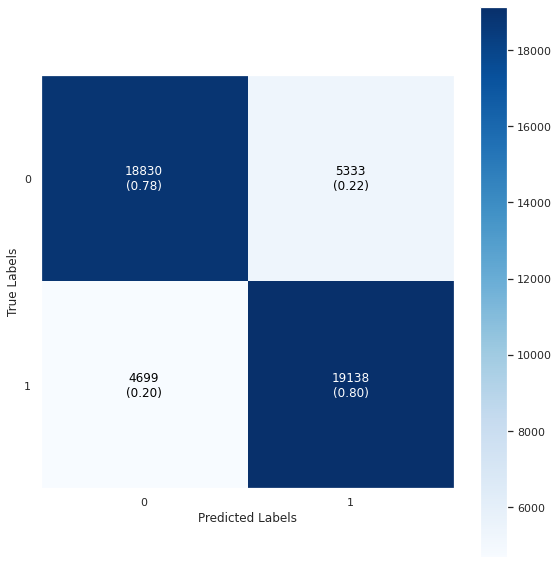

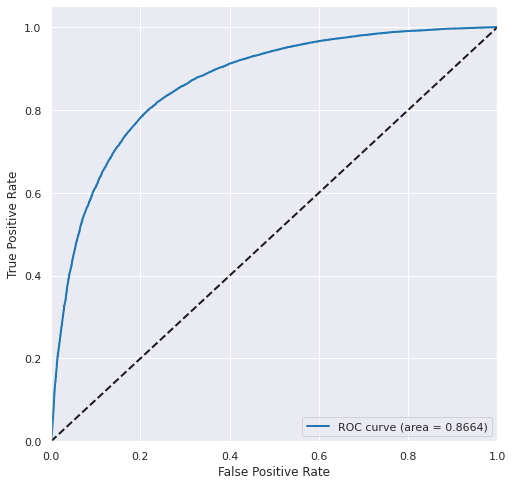

In [45]:
print("Accuracy Score on Test Set:")
print(accuracy_score(y_test, y_pred_lstm_keras))

# np.set_printoptions(precision=2)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_lstm_keras, classes=lstm_keras_clf_final.classes_)

# Plot ROC curve (requires onehot targets)Q
plot_roc_curve(y_test, y_score_lstm_keras[:,1], classes=lstm_keras_clf_final.classes_, roc_multilabel_count=2)

## SimpleTransformer ROBERTA Neural Network

### Preprocessing and Custom Sklearn Estimator

In [33]:
class RobertaClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, overwrite_output_dir=False, epochs=2, train_batch_size=6):#, best_model_dir=None, cache_dir=None, 
#                  num_workers=None, early_stopping_delta=None, early_stopping_patience=None,
#                  learning_rate=None, manual_seed=None, max_seq_length=None, output_dir=None,
#                  train_batch_size=None, use_early_stopping=None, weight_decay=None):
        
#         self.verbose = verbose
        self.overwrite_output_dir = overwrite_output_dir
#         self.adam_epsilon = adam_epsilon
        self.num_train_epochs = epochs
#         self.best_model_dir = best_model_dir
#         self.cache_dir = cache_dir
#         self.dataloader_num_workers = dataloader_num_workers
#         self.early_stopping_delta = early_stopping_delta
#         self.early_stopping_patience = early_stopping_patience
#         self.learning_rate = learning_rate
#         self.manual_seed = manual_seed
#         self.max_seq_length = max_seq_length
#         self.output_dir = output_dir
        self.train_batch_size = train_batch_size
#         self.use_early_stopping = use_early_stopping
#         self.weight_decay = weight_decay
    
#     def get_params(self, deep=True):

#         return {"adam_epsilon": self.adam_epsilon, 
#                 "epochs": self.num_train_epochs, 
#                 "best_model_dir": self.best_model_dir,
#                 "cache_dir": self.cache_dir,
#                 "num_workers": self.dataloader_num_workers,
#                 "early_stopping_delta": self.early_stopping_delta,
#                 "early_stopping_patience": self.early_stopping_patience,
#                 "learning_rate": self.learning_rate,
#                 "manual_seed": self.manual_seed,
#                 "max_seq_length": self.max_seq_length,
#                 "output_dir": self.output_dir,
#                 "train_batch_size": self.train_batch_size,
#                 "use_early_stopping": self.use_early_stopping,
#                 "weight_decay": self.weight_decay
#                }
    
#         """
#             adam_epsilon	float	1e-8	Epsilon hyperparameter used in AdamOptimizer.
#             best_model_dir	str	outputs/best_model	The directory where the best model (model checkpoints) will be saved (based on eval_during_training)
#             cache_dir	str	cache_dir	The directory where cached files will be saved.
#             config	dict	{}	A dictionary containing configuration options that should be overriden in a model’s config.
#             dataloader_num_workers	int	cpu_count () - 2 if cpu_count () > 2 else 1	Number of worker processed to use with the Pytorch dataloader.
#             do_lower_case	bool	False	Set to True when using uncased models.
#             dynamic_quantize	bool	False	Set to True to use dynamic quantization.
#             early_stopping_consider_epochs	bool	False	If True, end of epoch evaluation score will be considered for early stopping.
#             early_stopping_delta	float	0	The improvement over best_eval_loss necessary to count as a better checkpoint.
#             early_stopping_metric	str	eval_loss	The metric that should be used with early stopping. (Should be computed during eval_during_training).
#             early_stopping_metric_minimize	bool	True	Whether early_stopping_metric should be minimized (or maximized).
#             early_stopping_patience	int	3	Terminate training after this many evaluations without an improvement in the evaluation metric greater then early_stopping_delta.
#             encoding	str	None	Specify an encoding to be used when reading text files.
#             eval_batch_size	int	8	The evaluation batch size.
#             evaluate_during_training	bool	False	Set to True to perform evaluation while training models. Make sure eval data is passed to the training method if enabled.
#             evaluate_during_training_steps	int	2000	Perform evaluation at every specified number of steps. A checkpoint model and the evaluation results will be saved.
#             evaluate_during_training_verbose	bool	False	Print results from evaluation during training.
#             fp16	bool	True	Whether or not fp16 mode should be used. Requires NVidia Apex library.
#             gradient_accumulation_steps	int	1	The number of training steps to execute before performing a optimizer.step(). Effectively increases the training batch size while sacrificing training time to lower memory consumption.
#             learning_rate	float	4e-5	The learning rate for training.
#             logging_steps	int	50	Log training loss and learning at every specified number of steps.
#             manual_seed	int	None	Set a manual seed if necessary for reproducible results.
#             max_grad_norm	float	1.0	Maximum gradient clipping.
#             max_seq_length	int	128	Maximum sequence length the model will support.
#             multiprocessing_chunksize	int	500	Number of examples sent to a CPU core at a time when using multiprocessing. Usually, the optimal value will be (roughly) number of examples / process count.
#             n_gpu	int	1	Number of GPUs to use.
#             no_cache	bool	False	Cache features to disk.
#             no_save	bool	False	If True, models will not be saved to disk.
#             num_train_epochs	int	1	The number of epochs the model will be trained for.
#             output_dir	str	“outputs/”	The directory where all outputs will be stored. This includes model checkpoints and evaluation results.
#             overwrite_output_dir	bool	False	If True, the trained model will be saved to the ouput_dir and will overwrite existing saved models in the same directory.
#             process_count	int	cpu_count () - 2 if cpu_count () > 2 else 1	Number of cpu cores (processes) to use when converting examples to features. Default is (number of cores - 2) or 1 if (number of cores <= 2)
#             quantized_model	bool	False	Set to True if loading a quantized model. Note that this will automatically be set to True if dynamic_quantize is enabled.
#             reprocess_input_data	bool	True	If True, the input data will be reprocessed even if a cached file of the input data exists in the cache_dir.
#             save_eval_checkpoints	bool	True	Save a model checkpoint for every evaluation performed.
#             save_model_every_epoch	bool	True	Save a model checkpoint at the end of every epoch.
#             save_steps	int	2000	Save a model checkpoint at every specified number of steps.
#             save_optimizer_and_scheduler	bool	True	Save optimizer and scheduler whenever they are available.
#             silent	bool	False	Disables progress bars.
#             tensorboard_dir	str	None	The directory where Tensorboard events will be stored during training. By default, Tensorboard events will be saved in a subfolder inside runs/ like runs/Dec02_09-32-58_36d9e58955b0/.
#             train_batch_size	int	8	The training batch size.
#             use_cached_eval_features	bool	False	Evaluation during training uses cached features. Setting this to False will cause features to be recomputed at every evaluation step.
#             use_early_stopping	bool	False	Use early stopping to stop training when early_stopping_metric doesn’t improve (based on early_stopping_patience, and early_stopping_delta)
#             use_multiprocessing	bool	True	If True, multiprocessing will be used when converting data into features. Disabling can reduce memory usage, but may substantially slow down processing.
#             wandb_kwargs	dict	{}	Dictionary of keyword arguments to be passed to the W&B project.
#             wandb_project	str	None	Name of W&B project. This will log all hyperparameter values, training losses, and evaluation metrics to the given project.
#             warmup_ratio	float	0.06	Ratio of total training steps where learning rate will “warm up”. Overridden if warmup_steps is specified.
#             warmup_steps	int	0	Number of training steps where learning rate will “warm up”. Overrides warmup_ratio.
#             weight_decay	int	0	Adds L2 penalty.

#         """

#     def set_params(self, **parameters):
#         for parameter, value in parameters.items():
#             setattr(self, parameter, value)
#         return self
        
        
    def fit(self, X, y): 
        
        # Check that X and y have correct shape
#         X, y = check_X_y(X, y)
        # Store the classes seen during fit
        self.classes_ = unique_labels(y)
        
        df = X.rename(columns={"Tweet":"text"})
        df["label"] = y
#         display(df)
        
        self.df_ = df
        
        # Optional model configuration
        model_args = ClassificationArgs()
        model_args.overwrite_output_dir = self.overwrite_output_dir
#         model_args.adam_epsilon = self.adam_epsilon
        model_args.num_train_epochs = self.num_train_epochs
#         model_args.best_model_dir = self.best_model_dir
#         model_args.cache_dir = self.cache_dir
#         model_args.dataloader_num_workers = self.dataloader_num_workers
#         model_args.early_stopping_delta = self.early_stopping_delta
#         model_args.early_stopping_patience = self.early_stopping_patience
#         model_args.learning_rate = self.learning_rate
#         model_args.manual_seed = self.manual_seed
#         model_args.max_seq_length = self.max_seq_length
#         model_args.output_dir = self.output_dir
        model_args.train_batch_size = self.train_batch_size
#         model_args.use_early_stopping = self.use_early_stopping
#         model_args.weight_decay = self.weight_decay
        
        print(model_args)
        # Create a ClassificationModel
        self.model = ClassificationModel(
            "distilbert", "distilbert-base-uncased", args=model_args, use_cuda=True
            #"roberta", "roberta-base", args=model_args, use_cuda=True
        )

        # Train the model
        self.model.train_model(self.df_)

        # Return the classifier
        return self
    
    

    def predict(self, X):
        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
#         X = check_array(X)
        
        # Predictions
        y_pred, _ = self.model.predict(X)
        
        return y_pred
    
    
    def predict_proba(self, X):
        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
#         X = check_array(X)
        
        # Predictions
        _, y_rawout = self.model.predict(X)
        y_pred_proba = softmax(y_rawout, axis=1)

        return y_pred_proba

In [34]:
# Dense neural net classification
roberta_clf = RobertaClassifier(overwrite_output_dir=True, epochs=5, train_batch_size=16) # wrap the model

# Specify Keras callbacks for early stopping and checkpoints
# calls = [ModelCheckpoint(, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")]
    
roberta_clf_fullpipe = Pipeline(steps=[
    ("roberta_estimator", roberta_clf)
])
print(roberta_clf_fullpipe)
print("")

Pipeline(steps=[('roberta_estimator',
                 RobertaClassifier(epochs=None, overwrite_output_dir=True,
                                   train_batch_size=16))])



D:\Users\Michael\anaconda3\envs\ml_nlp\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


In [35]:
# Specify hyperparameter grids for optimization
roberta_param_grid = {
#    "roberta_estimator__epochs":[2]
}

roberta_param_grid.update(text_param_grid)

In [36]:
# Dictionary of pipelines and classifier types for ease of reference
try:
    pipe_dict["Roberta"] = (roberta_clf_fullpipe, roberta_param_grid)   
except NameError:
    pipe_dict = {
    "Roberta": (roberta_clf_fullpipe, roberta_param_grid),
    }

### Train the ROBERTA neural network pipeline model

In [37]:
roberta_clf_final = pipeline_fit(
                                        X_train=X_train,
                                        y_train=y_train,
                                        pipeline="Roberta", 
                                        search_method=None,#"gridsearch",
#                                         n_jobs=6,
                                        verbose_searchcv=1,  
                                        save_name="News_Roberta"
                                    )

A joblib model file already exists with that name, 
do you wish to retrain the model? (Y/N) y


No hyperparameter optimization
Training Roberta on 2005 samples...
('roberta_estimator', RobertaClassifier(epochs=None, overwrite_output_dir=True, train_batch_size=16))
ClassificationArgs(adam_epsilon=1e-08, best_model_dir='outputs/best_model', cache_dir='cache_dir/', config={}, cosine_schedule_num_cycles=0.5, custom_layer_parameters=[], custom_parameter_groups=[], dataloader_num_workers=0, do_lower_case=False, dynamic_quantize=False, early_stopping_consider_epochs=False, early_stopping_delta=0, early_stopping_metric='eval_loss', early_stopping_metric_minimize=True, early_stopping_patience=3, encoding=None, adafactor_eps=(1e-30, 0.001), adafactor_clip_threshold=1.0, adafactor_decay_rate=-0.8, adafactor_beta1=None, adafactor_scale_parameter=True, adafactor_relative_step=True, adafactor_warmup_init=True, eval_batch_size=8, evaluate_during_training=False, evaluate_during_training_silent=True, evaluate_during_training_steps=2000, evaluate_during_training_verbose=False, evaluate_each_epoch=

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

  0%|          | 0/2005 [00:00<?, ?it/s]

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Running Epoch 0 of 5:   0%|          | 0/126 [00:00<?, ?it/s]

D:\Users\Michael\anaconda3\envs\ml_nlp\lib\site-packages\torch\optim\lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running Epoch 1 of 5:   0%|          | 0/126 [00:00<?, ?it/s]

Running Epoch 2 of 5:   0%|          | 0/126 [00:00<?, ?it/s]

Running Epoch 3 of 5:   0%|          | 0/126 [00:00<?, ?it/s]

Running Epoch 4 of 5:   0%|          | 0/126 [00:00<?, ?it/s]

### Evaluation

In [38]:
# dense_keras_clf_final.named_steps["keras_estimator"].model = load_model(save_name+"_"+pipeline+".h5")


y_pred_roberta = roberta_clf_final.predict(X_test["text"].tolist())
y_score_roberta = roberta_clf_final.predict_proba(X_test["text"].tolist())

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/860 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

In [39]:
print(y_score_roberta)

[[0.26288914 0.73711086]
 [0.19345194 0.80654806]
 [0.97215155 0.02784845]
 ...
 [0.6945099  0.3054901 ]
 [0.11357959 0.88642041]
 [0.98426089 0.01573911]]


Accuracy Score on Test Set:
0.7220930232558139


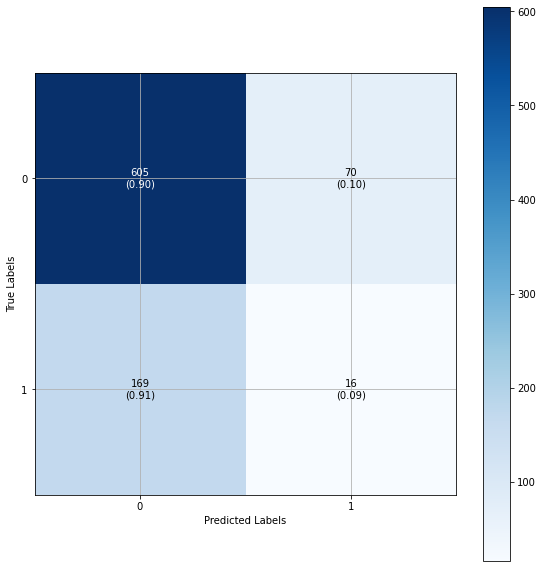

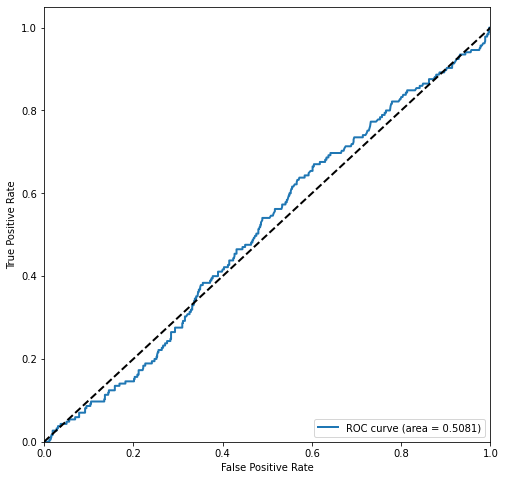

In [40]:
print("Accuracy Score on Test Set:")
print(accuracy_score(y_test, y_pred_roberta))

# np.set_printoptions(precision=2)

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_roberta, classes=roberta_clf_final.classes_)

# Plot ROC curve (requires onehot targets)Q
plot_roc_curve(y_test, y_score_roberta[:,1], classes=roberta_clf_final.classes_, roc_multilabel_count=2)

# Voting Classifier

In [ ]:
## Use a soft voting classifier to make final predictions from all models
vote_clf = VotingClassifier(estimators=[
                            ("nb_clf", nb_clf_final.named_steps["nb_classifier"]), 
                            ("rf_clf", rf_clf_final.named_steps["rf_classifier"]),
                            #("gb_clf", gb_clf_final), 
                            #("xgb_clf", xgb_clf_final),
                            ("lgbm_clf", lgbm_clf_final.named_steps["lgbm_classifier"])
                            ], voting="soft")

vote_clf_fullpipe = Pipeline(steps=[
                                ("preprocessor", preprocessor),
                                ("voting_classifier", vote_clf)
                            ])

print(vote_clf_fullpipe)


pipe_dict["VotingClassifier"] = (vote_clf_fullpipe,)

In [ ]:
vote_clf_final = pipeline_fit(pipeline="VotingClassifier", cv=None, iid=False, verbose=2, n_jobs=1, optimization=False)

In [ ]:
#display(X_valid)
y_pred = vote_clf_final.predict(X_valid)
#y_pred = lgbm_clf_final.predict(X_valid)
print("Predicted Targets:",y_pred)
print("Actual Targets:",y_valid)

In [ ]:
y_pred_2 = lgbm_clf_final.predict(X_valid_2)
print("Predicted Targets:",y_pred_2)
print("Actual Targets:",y_valid_2)

In [ ]:
#y_pred_inv = le.inverse_transform(y_pred)
target_names = le.classes_
print("Target names: ",target_names)
n_classes = le.classes_.shape[0]
print("n_classes: ",n_classes)
print("\nClassification Report:")
print(classification_report(y_valid, y_pred, target_names=target_names))
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred, labels=range(n_classes)))

In [ ]:
target_names = le.classes_
print("Target names: ",target_names)
n_classes = le.classes_.shape[0]
print("n_classes: ",n_classes)
print("\nClassification Report:")
print(classification_report(y_valid_2, y_pred_2, target_names=target_names))
print("Confusion Matrix:")
print(confusion_matrix(y_valid_2, y_pred_2, labels=range(n_classes)))